# Housing Price Prediction - Lasso_RIDGE_Regularization
### Problem Statement
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market, in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Expected outcome
 * Which variables are significant in predicting the price of a house, and
 * How well those variables describe the price of a house.
 * Optimal value of lambda for ridge and lasso regression.

### Steps Involved:
 * 1. Reading, understanding and visualising the data.
 * 2. EDA 
 * 3. Data Standardisation
 * 4. Test Train Fit
 * 5. Normalization 
 * 6. Model building
 * 7. Predictions and evaluation on the test set
 

## Importing relevant libraries

In [592]:
# Importing pandas, numpy and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
%matplotlib inline

# 1. Reading, understanding and visualising the data.
* Treating Numeric
* Treating Categorical

In [593]:
# Read the data
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [594]:
df.shape


(1460, 81)

In [595]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [596]:
# To get the description of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Dropping ID column as it is just a unique key column

In [597]:
df.drop(['Id'], axis=1, inplace=True)

### Treating Numeric Columns
* Identifying percentage of nulls in numreic  columns
* Deriving columns

In [598]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [599]:
# Checking for percentage nulls
x = round(100*(df_numeric.isnull().sum()/len(df_numeric.index)), 2)
x[x > 0].sort_values(ascending= False)


LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

In [603]:
df.loc[np.isnan(df['LotFrontage']), 'LotFrontage'] = df['LotFrontage'].median()


* It can be seen that , GarageYrBlt,MasVnrArea
* Replace with mean LotFrontage
* Handling Nulls referring DataDict, as NaN signifies business logicfor few.
* Since we have less amount of data it is preferred substitute null values than dropping rows
* As the above columns have NA due to absesense of any information on respective categorical variables we can substitute '0' 
* Dropping GarageYrBlt as its not significant 

In [604]:
# Replacing nulls with 0
col = ['MasVnrArea']
for i in col:
 df[col] = df[col].fillna(0)



* Further checking data columns 
* We can derive age of house using YrSold YearBuilt and we can drop them post deriving 
* MoSold YearRemodAdd will be showing similar trend and adds to collinearity hence removing them

In [605]:
# Age of the house 
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [606]:
df.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold', 'MoSold'], axis=1, inplace=True)


In [607]:
# Verifying post replacing
df_numeric = df.select_dtypes(include=['float64', 'int64'])
# Checking for percentage nulls
x = round(100*(df_numeric.isnull().sum()/len(df_numeric.index)), 2)
x[x > 0].sort_values(ascending= False)

Series([], dtype: float64)

# Categorical columns
* Converting numeric to categorical column OverallQual, OverallCond and MSSubClass are categorical column but in the original dataset the types of these columns are numeric. Hence converting these columns to categorical.
* Identifying nulls 

In [608]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [609]:
# Checking for percentage nulls
x = round(100*(df.isnull().sum()/len(df.index)), 2)
x[x > 0].sort_values(ascending= False)


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### Handling missing values
* Replacing few NA values to relevant names
* We can see from the data dictonary that for few columns the NA value represents the not present of the feature in the house instead of representing the missing values. Hence, we need to impute the NA or the missing values for those columns to the relevant name.
* Replacing Electrical with max value SBrkr
* Updating MasVnrType to None

In [610]:
df['Alley'] = df['Alley'].replace(np.nan, 'No Alley')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No Fireplace')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['PoolQC'] = df['PoolQC'].replace(np.nan, 'No Pool')
df['Fence'] = df['Fence'].replace(np.nan, 'No Fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan, 'No MiscFeature')

In [611]:
df['Electrical'].value_counts()


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [612]:
df['MasVnrType'].value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

* Replacing NA with Mode

In [613]:
df.loc[pd.isnull(df['Electrical']), ['Electrical']] = 'SBrkr'
df.loc[pd.isnull(df['MasVnrType']), ['MasVnrType']] = 'None'


In [614]:
# Checking for percentage nulls
x = round(100*(df.isnull().sum()/len(df.index)), 2)
x[x > 0].sort_values(ascending= False)

Series([], dtype: float64)

### * All nulls are handled

# 2. EDA
 * Treating Outliers
 * Visualization

In [615]:
df_list = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(df_list)


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge']


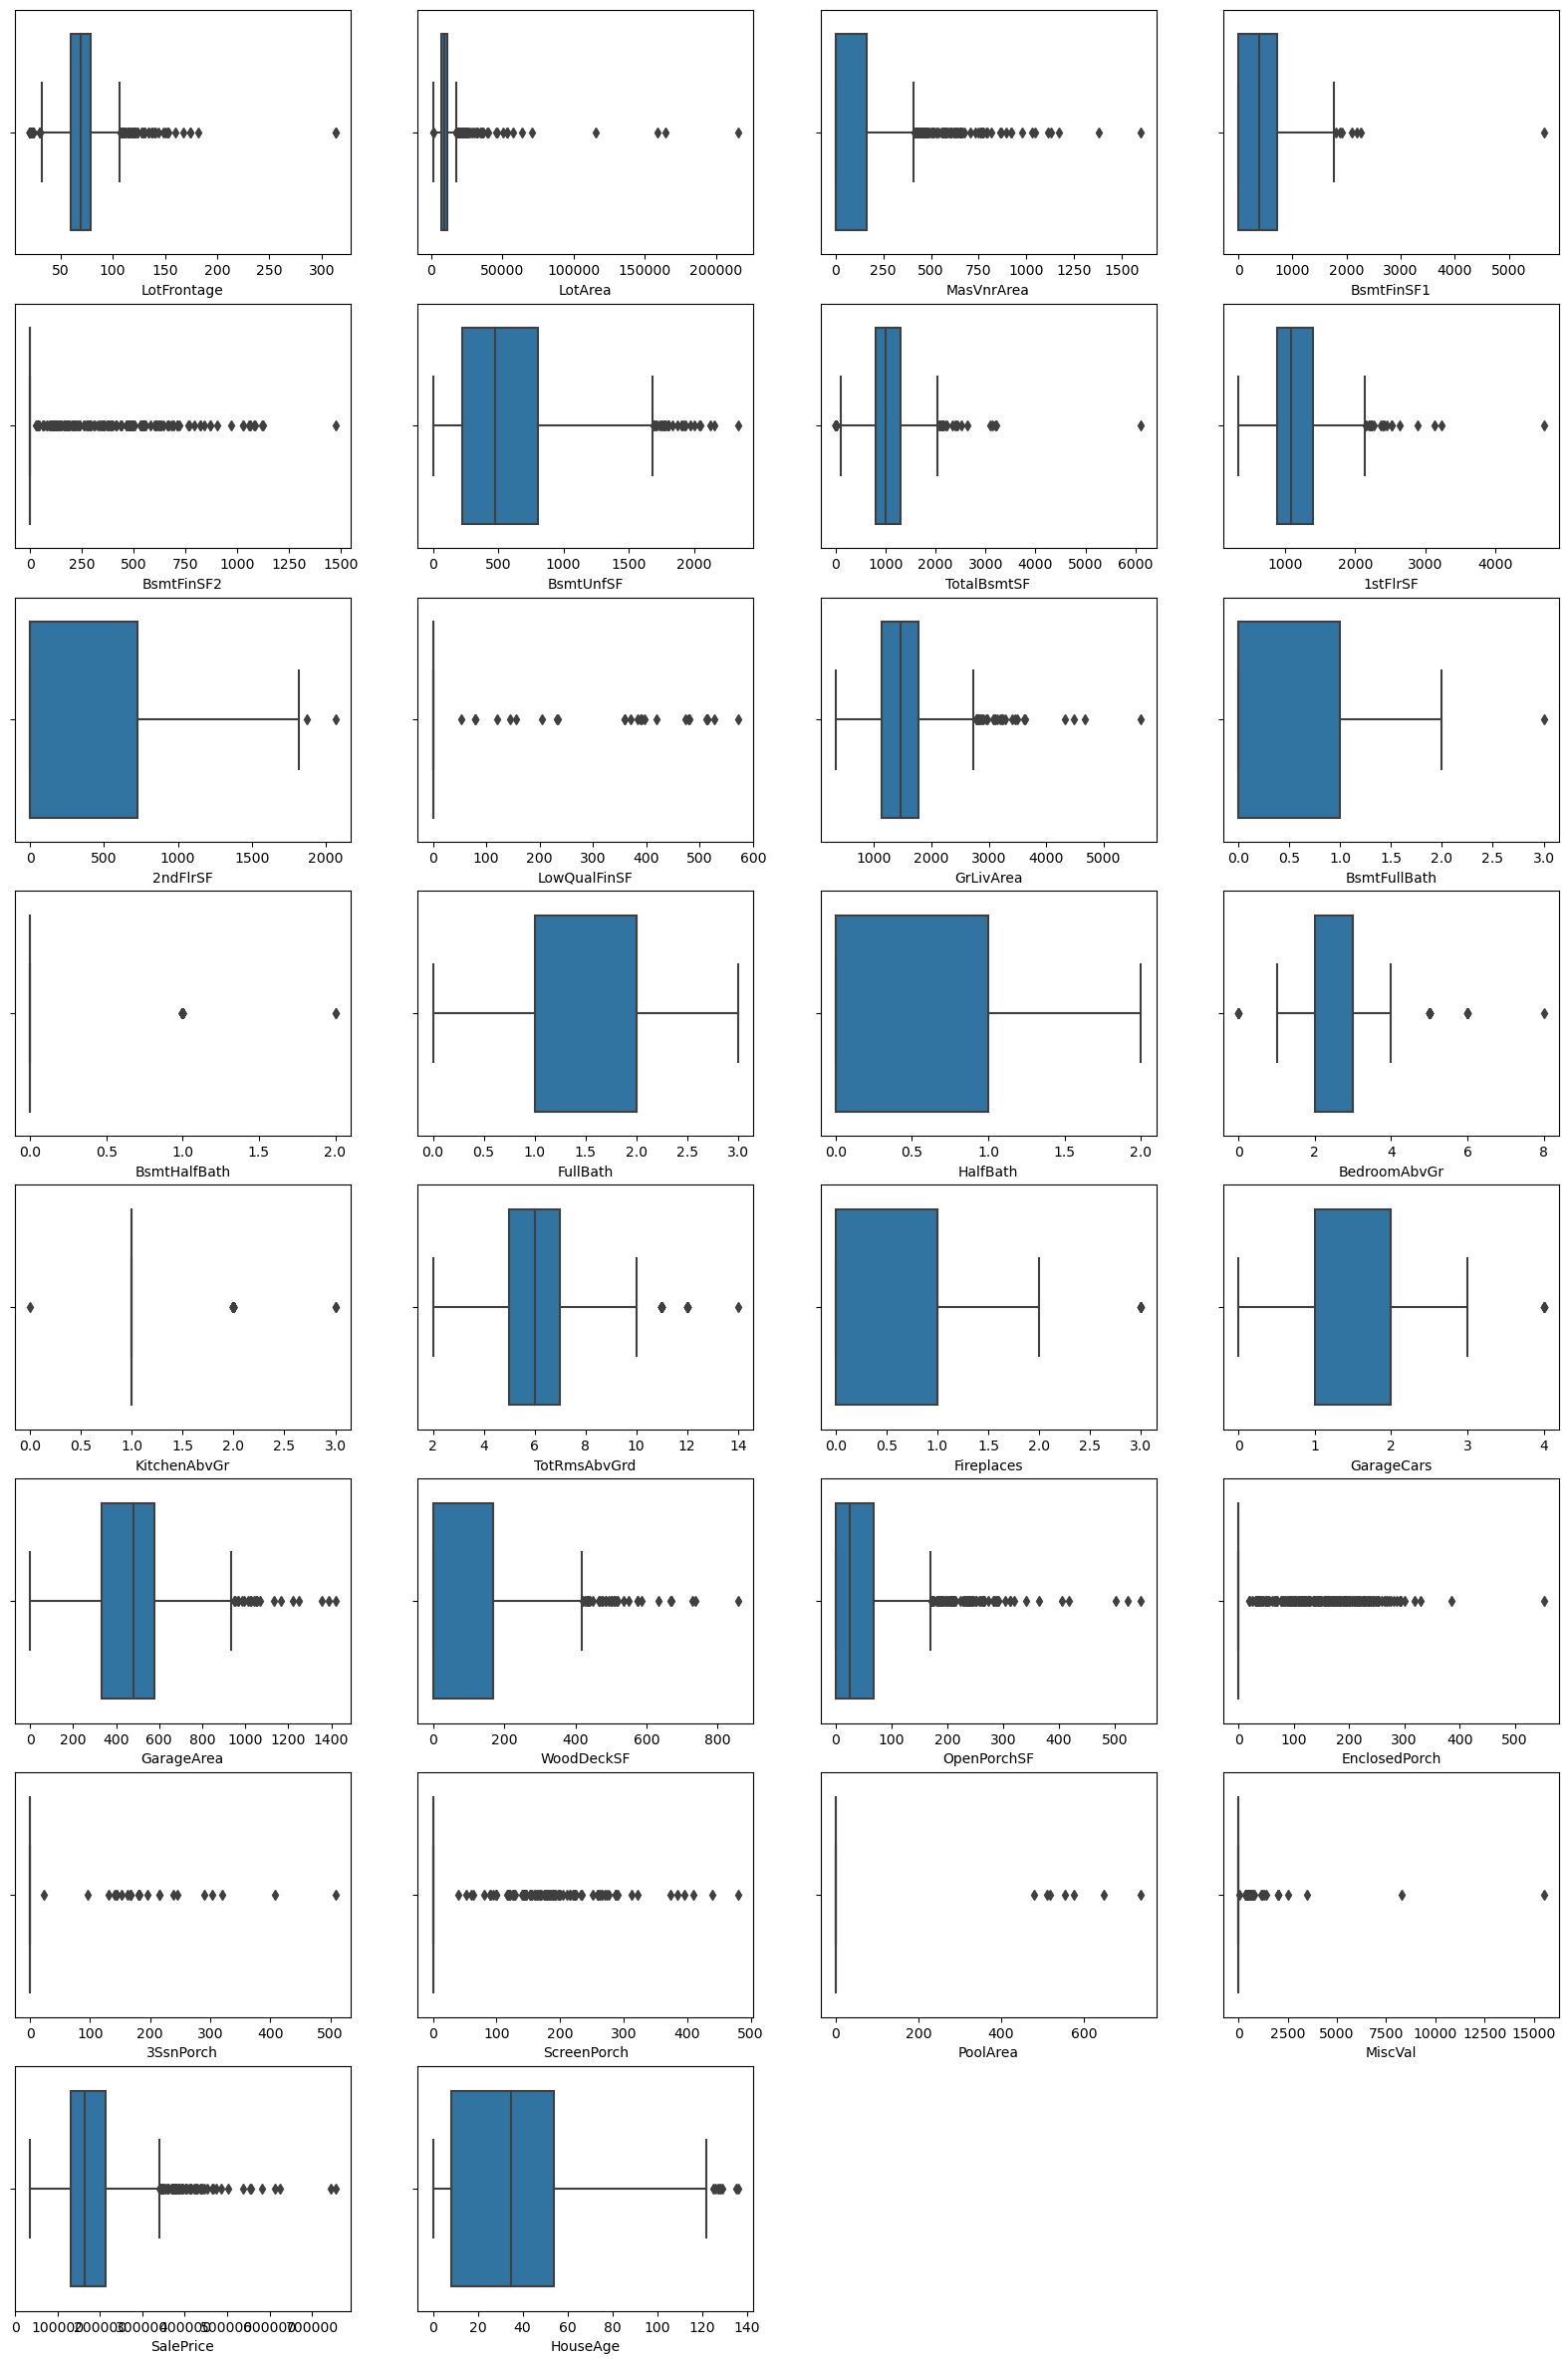

In [616]:
# Plotting boxplot for numeric columns 
plt.figure(figsize=(20,30))
for i in enumerate(df_list):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=df)

In [617]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [618]:
df.describe(percentiles = [0.05,0.2, 0.4, 0.6, 0.8,0.85,0.9,0.95])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
5%,35.950000,3311.700000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88000.000000,1.000000
20%,59.000000,7078.400000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.000000,1066.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124000.000000,5.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,0.000000,1339.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147000.000000,24.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
60%,70.000000,10198.200000,16.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,0.000000,1578.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,2.000000,516.000000,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179280.000000,42.400000
80%,80.000000,12205.800000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,230000.000000,60.200000


####  Observations
* As seen in the boxplot for numeric variables it can be seen almost all datasets have outliers
* Checking quantile distribution upto 95% shows huge difference with max value.
* Since data is seen more or less continuous till 95 percentile updating outliers to 5% to 95%

In [619]:
df.shape

(1460, 76)

* Substituting outliers to .05,.95 quantile

In [620]:
# or you can create a custom list of numerical columns

df[df_list] = df[df_list].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

In [621]:
df.shape

(1460, 76)

In [622]:
df.describe(percentiles = [0.05,0.2, 0.4, 0.6, 0.8,0.85,0.9,0.95])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.0,1460.000000,1460.000000
mean,69.112568,9682.319212,92.047945,431.089041,32.931233,556.537671,1055.950616,1151.861370,337.731267,0.0,1498.922123,0.413699,0.056164,1.54863,0.374658,2.882192,1.0,6.500685,0.609589,1.763699,468.187877,88.889726,42.864829,19.154075,0.0,11.580822,0.0,0.0,177364.339726,35.984247
std,16.509008,3469.967624,140.590668,412.214952,100.569218,414.582219,346.901853,333.684061,415.255848,0.0,450.732225,0.492665,0.230318,0.49780,0.484200,0.660102,0.0,1.515965,0.634547,0.739318,202.064708,109.391899,53.144211,50.385647,0.0,40.117506,0.0,0.0,64562.632260,28.829159
min,35.950000,3311.700000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.0,848.000000,0.000000,0.000000,1.00000,0.000000,2.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,88000.000000,1.000000
5%,35.997500,3315.785000,0.000000,0.000000,0.000000,0.000000,519.965000,672.997500,0.000000,0.0,848.000000,0.000000,0.000000,1.00000,0.000000,2.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,88000.000000,1.000000
20%,59.000000,7078.400000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.0,1066.600000,0.000000,0.000000,1.00000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,124000.000000,5.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,0.0,1339.000000,0.000000,0.000000,1.00000,0.000000,3.000000,1.0,6.000000,0.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,147000.000000,24.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.000000,2.00000,0.000000,3.000000,1.0,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.0,0.000000,0.0,0.0,163000.000000,35.000000
60%,70.000000,10198.200000,16.000000,525.600000,0.000000,604.400000,1088.000000,1182.000000,455.400000,0.0,1578.000000,1.000000,0.000000,2.00000,0.000000,3.000000,1.0,7.000000,1.000000,2.000000,516.000000,100.000000,40.000000,0.000000,0.0,0.000000,0.0,0.0,179280.000000,42.400000
80%,80.000000,12205.800000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.0,1869.000000,1.000000,0.000000,2.00000,1.000000,3.000000,1.0,8.000000,1.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.0,0.000000,0.0,0.0,230000.000000,60.200000


### Visualization and checking relationship

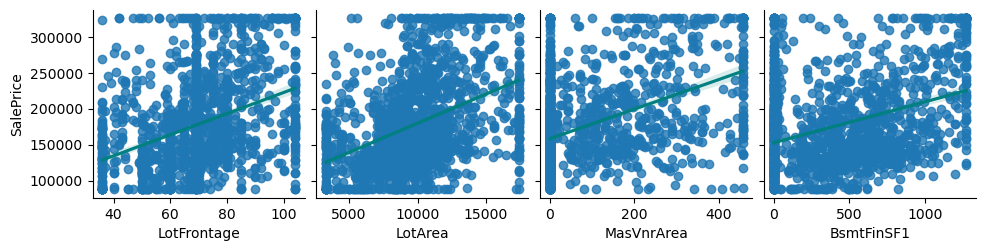

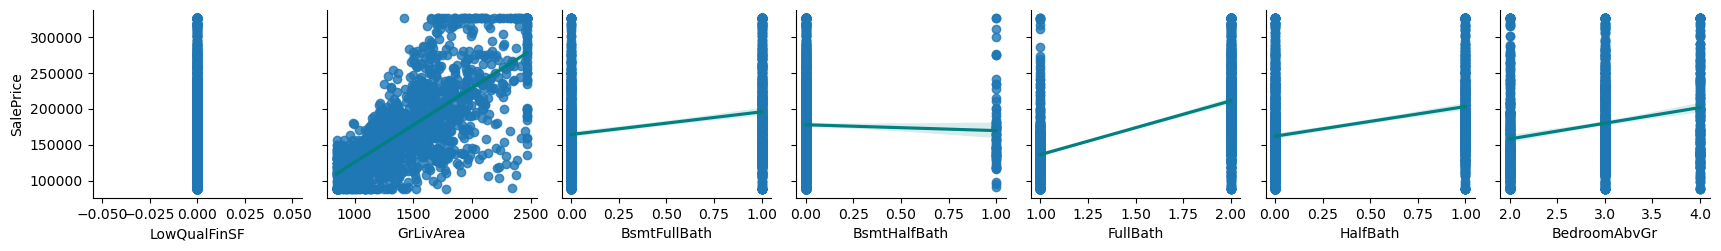

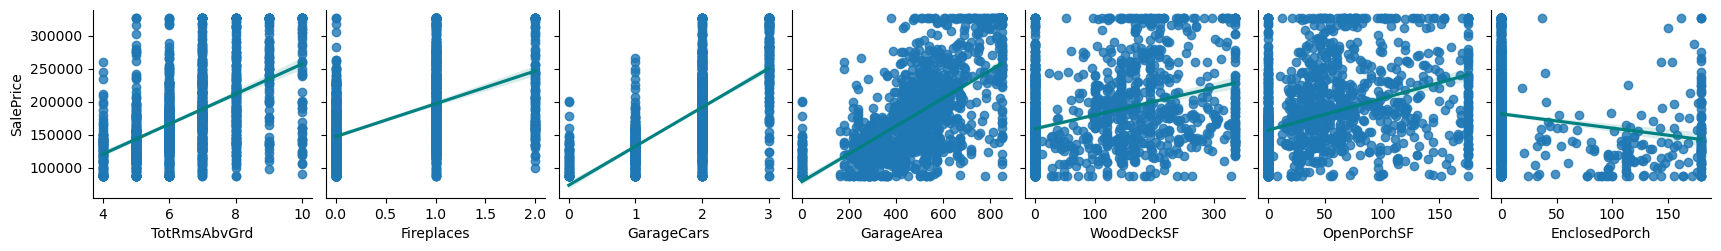

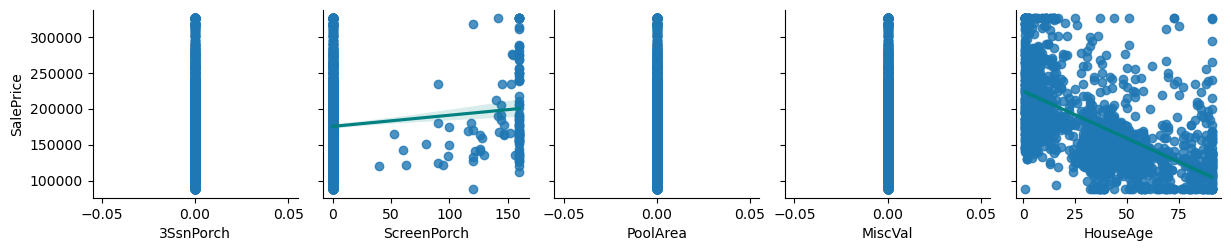

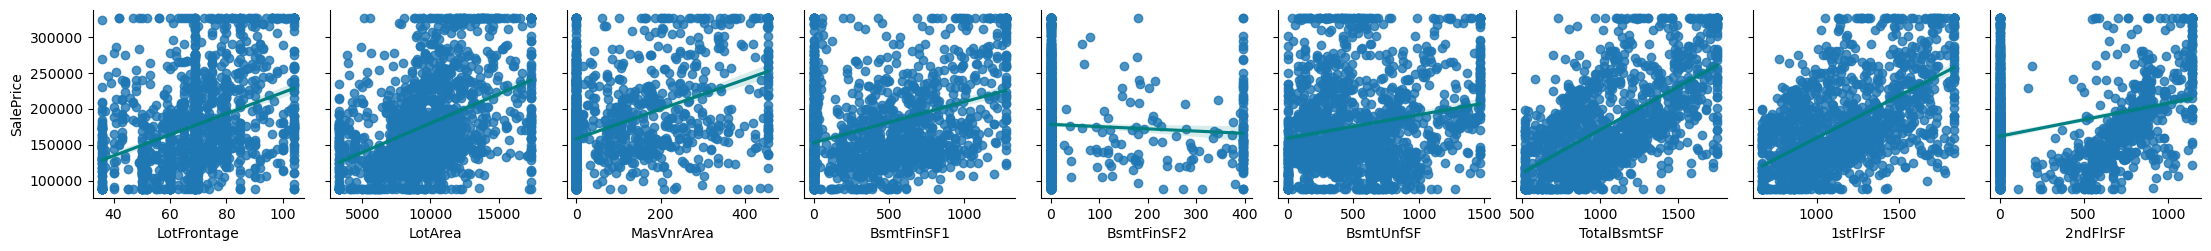

In [623]:
sns.pairplot(df, x_vars=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(df, x_vars=['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(df, x_vars=['TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(df, x_vars=['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','HouseAge'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(df, x_vars=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})


## Correlation using heat map

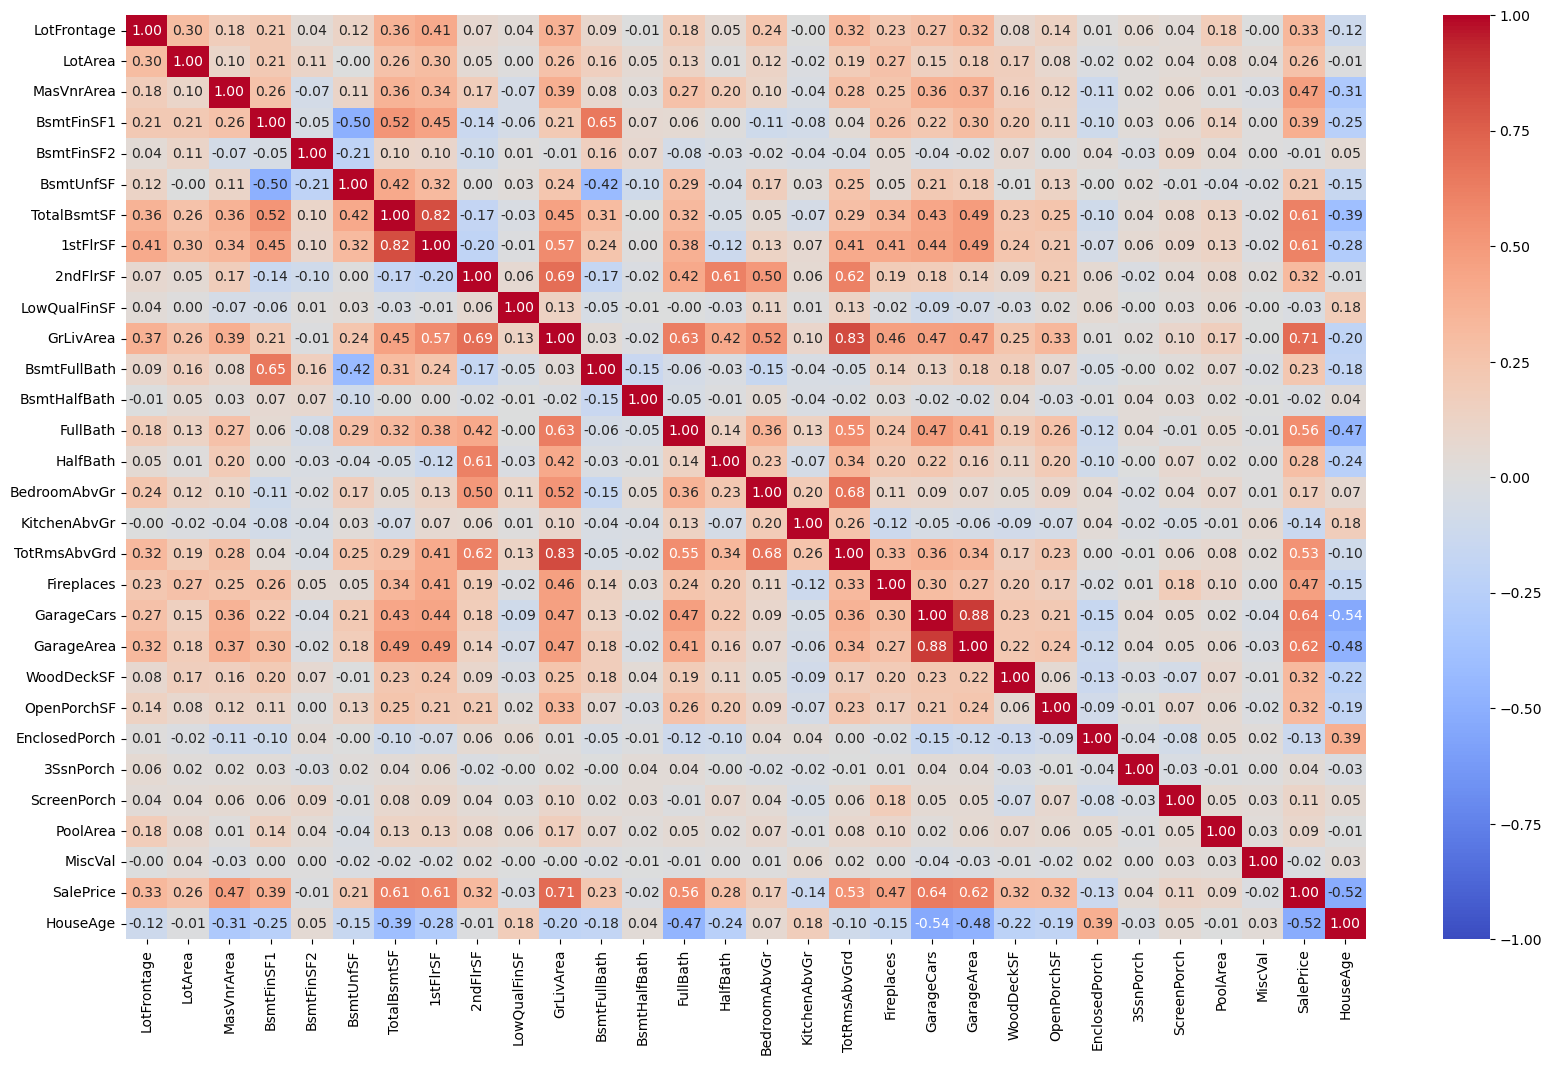

In [624]:
# Creating correlation heatmap
plt.figure(figsize = (20, 12))
sns.heatmap(df_numeric.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalePrice is highly (positively) correlated with Grlivarea

- Price is negatively correlated to ```houseage``` and ```BsmntFinsf2```, ```enclosedporch```

Correlation among independent variables:
* TotalBsmtSF shows higher correlation with 1stFlrSF
* GarageArea shows higher correlation with GarageCar

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).



In [625]:
df.drop(['TotalBsmtSF','GarageArea'], axis=1, inplace=True)

In [626]:
df.shape

(1460, 74)

## Categorical analyisis
* Check value counts
* Drop columns with more than 80% dataset having similar records
* Grouping less frequent data to one category

In [627]:
df_categorical = df.select_dtypes(include=['object'])

In [628]:
df_c = list(df.select_dtypes(include=['object']).columns)
print(df_c)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Bar plot for categorical columns with value counts

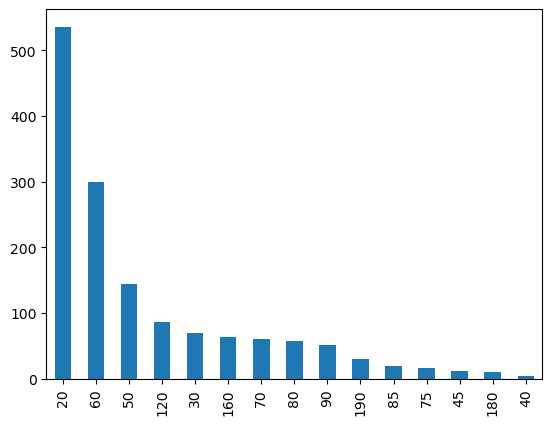

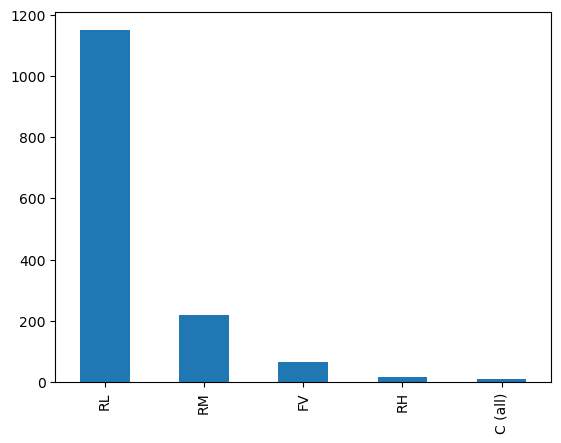

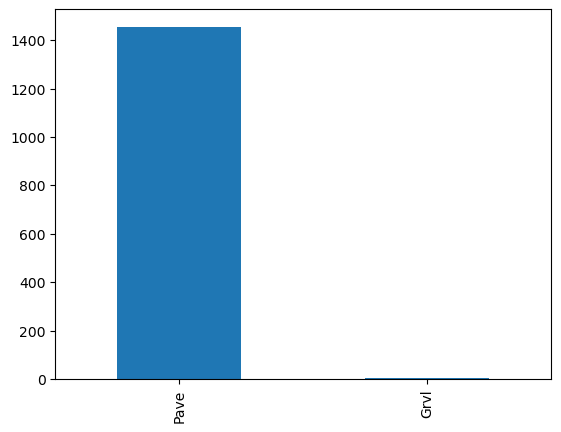

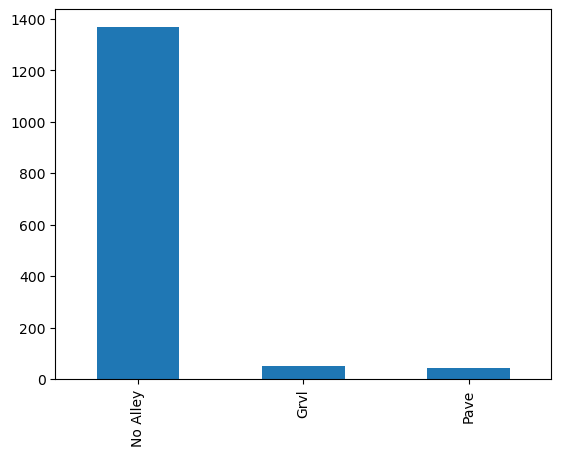

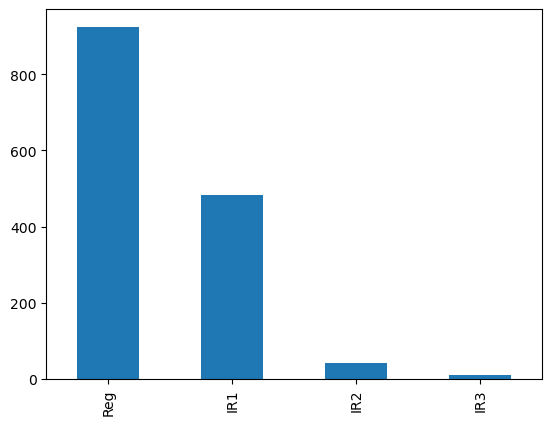

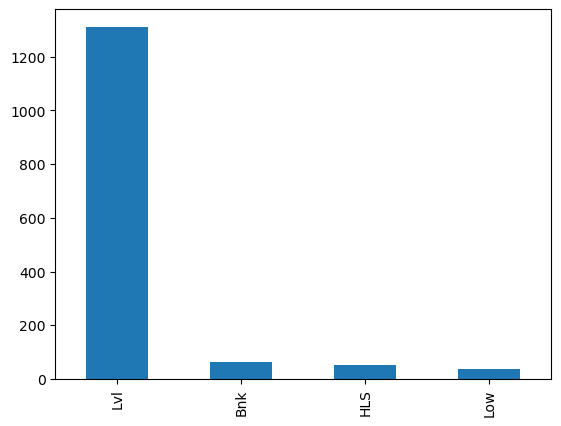

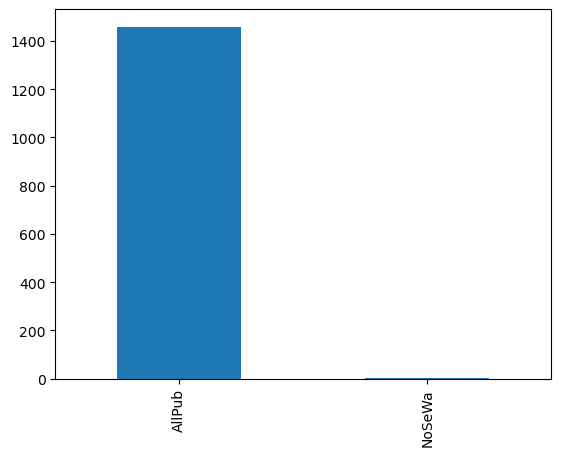

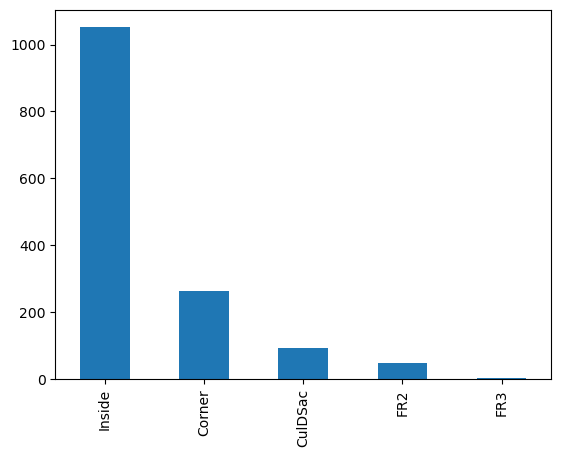

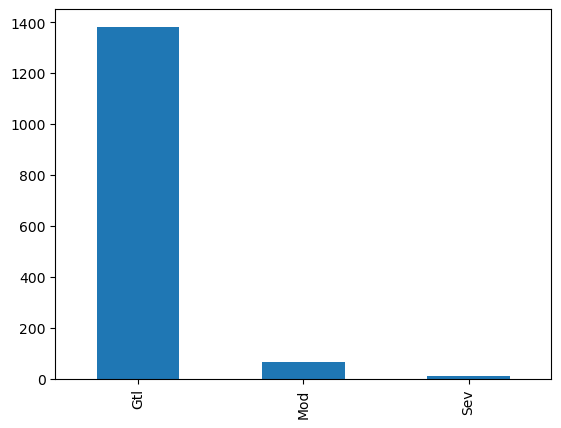

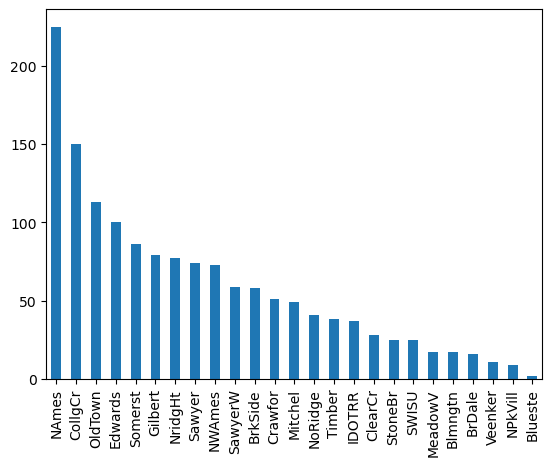

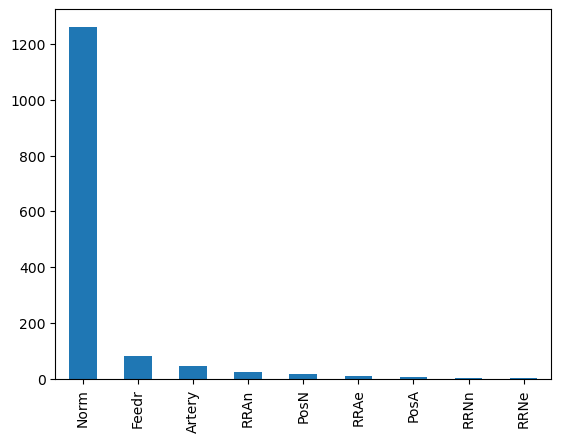

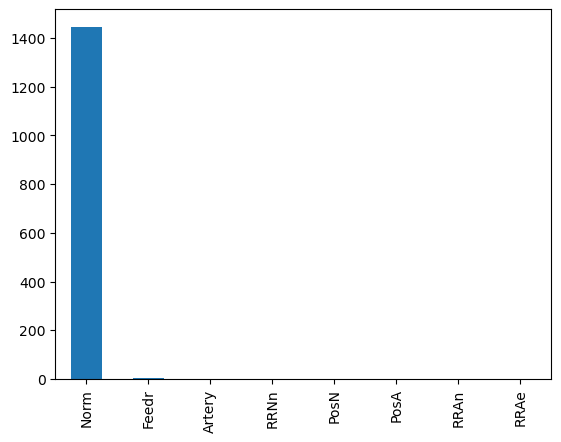

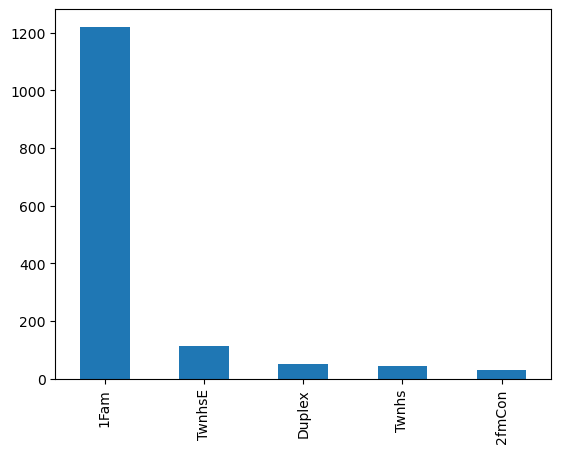

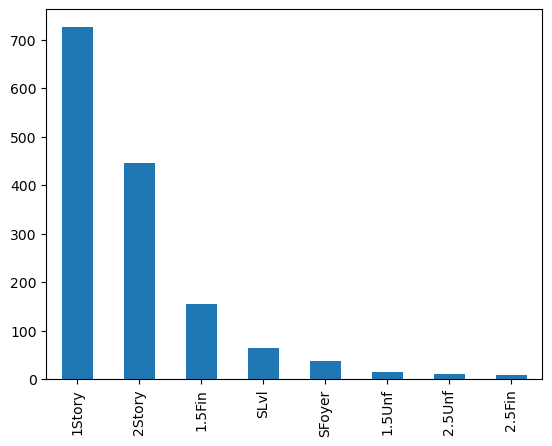

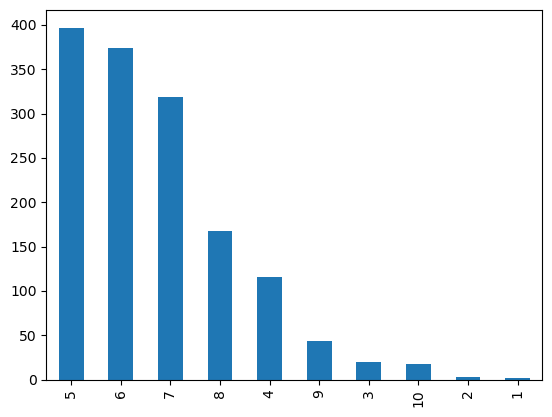

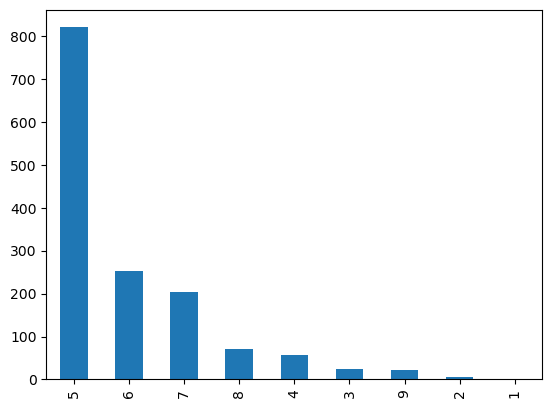

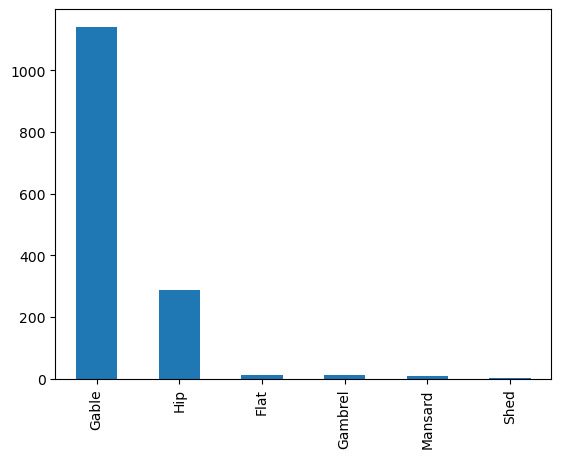

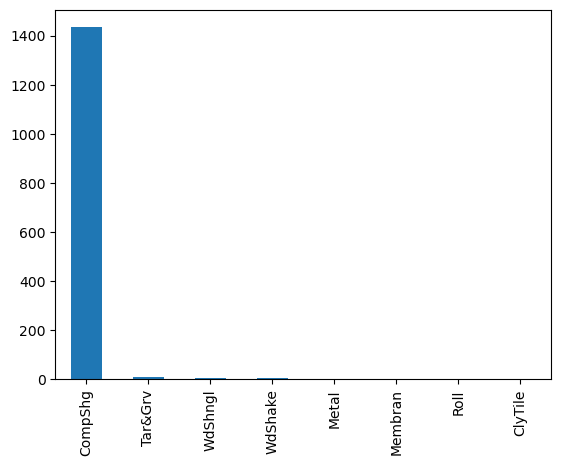

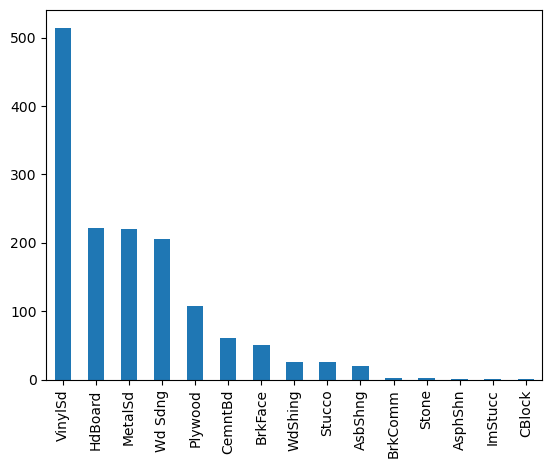

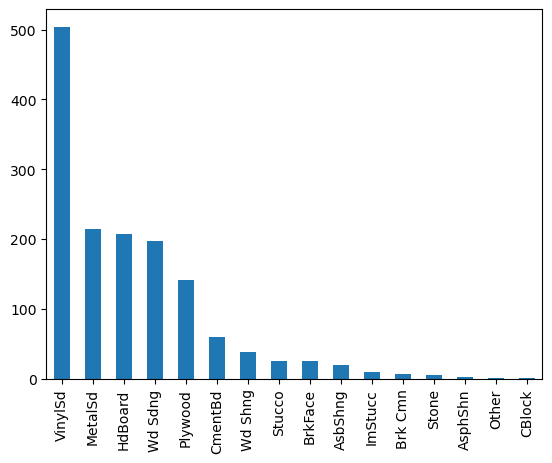

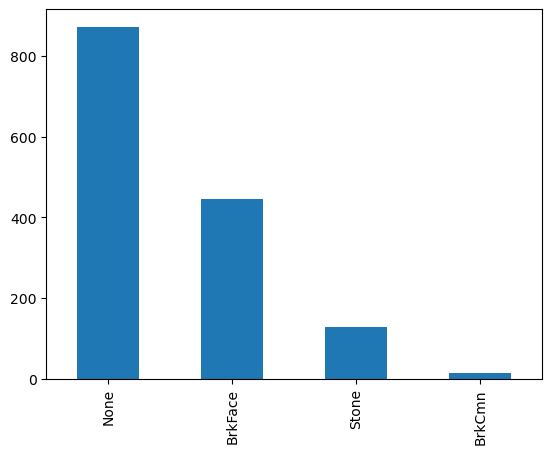

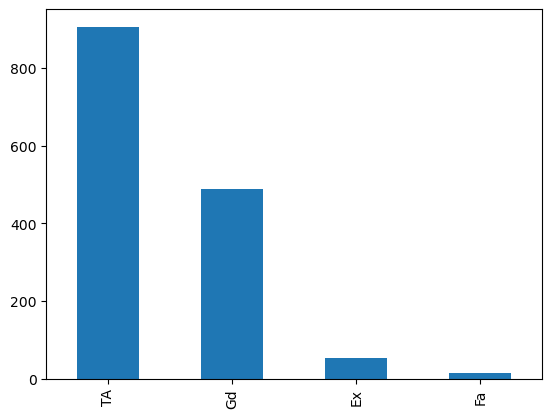

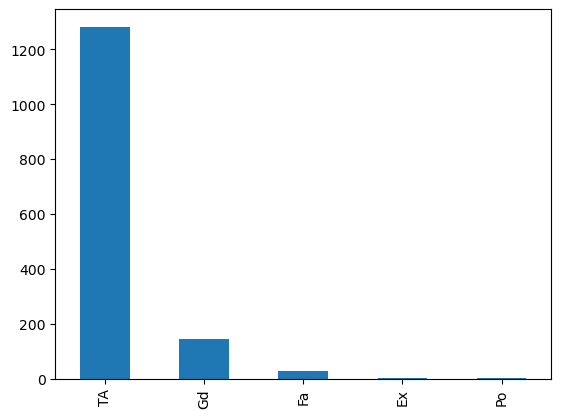

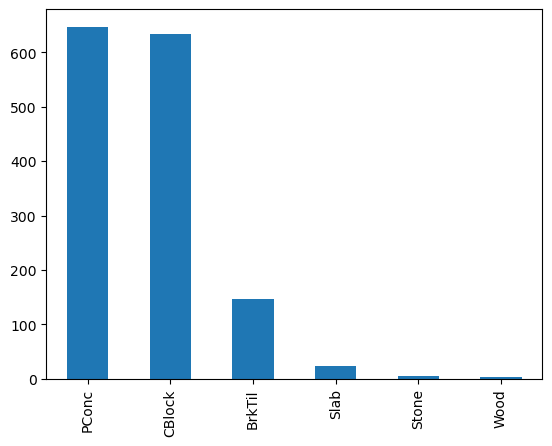

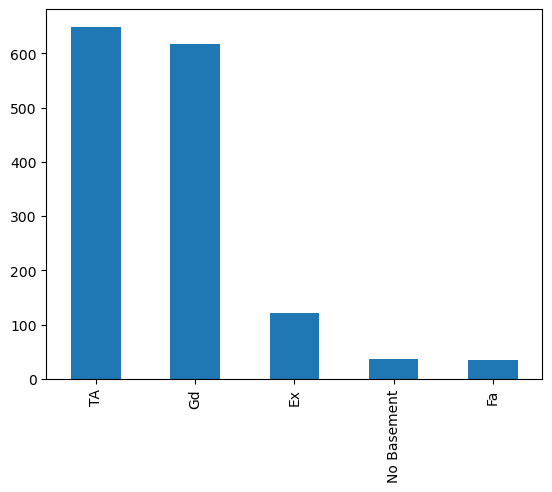

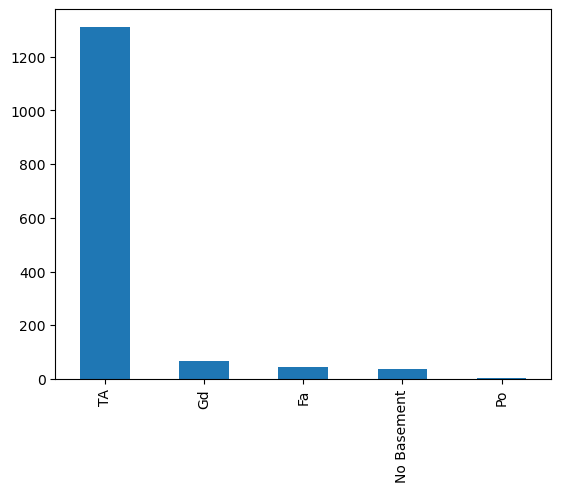

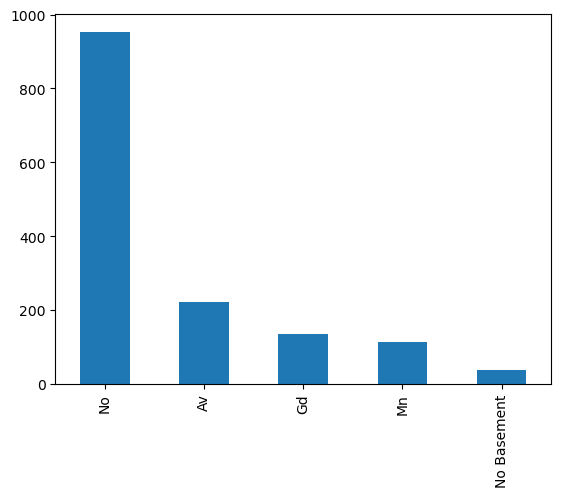

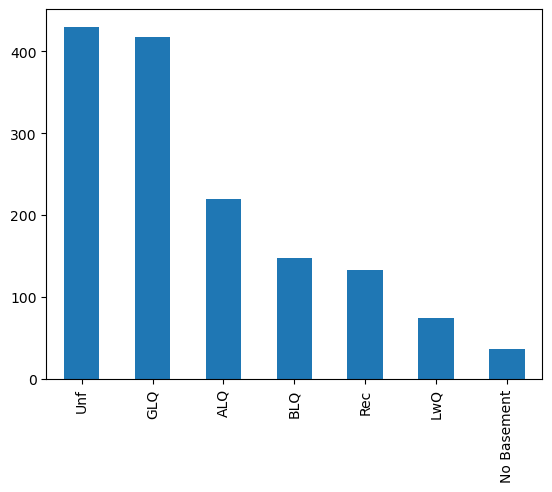

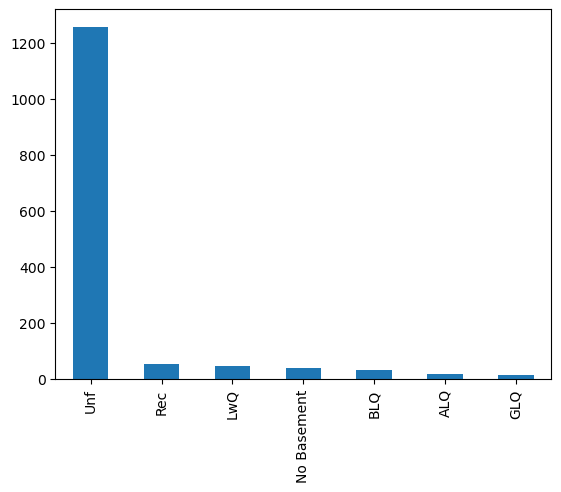

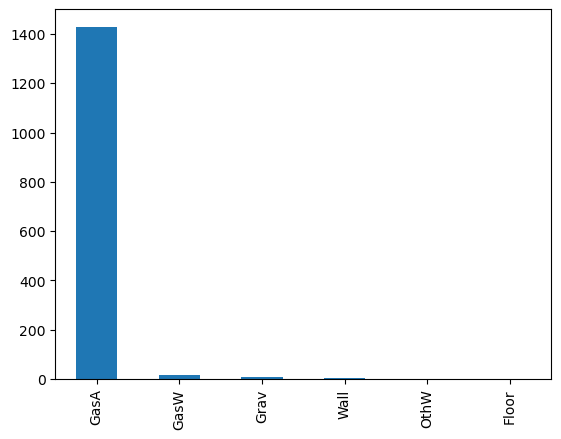

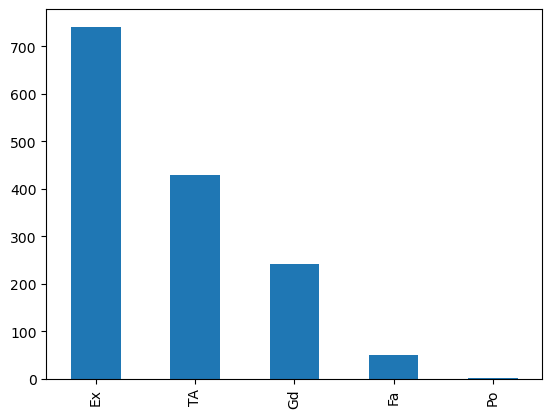

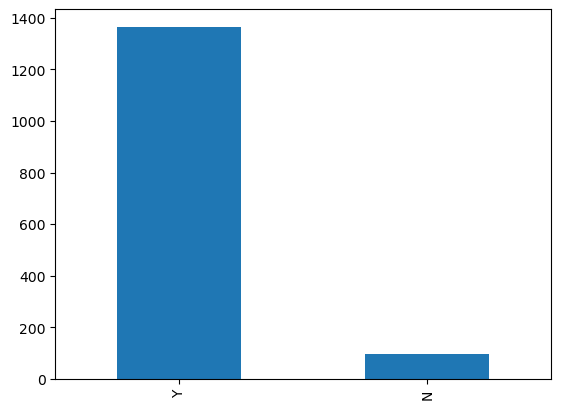

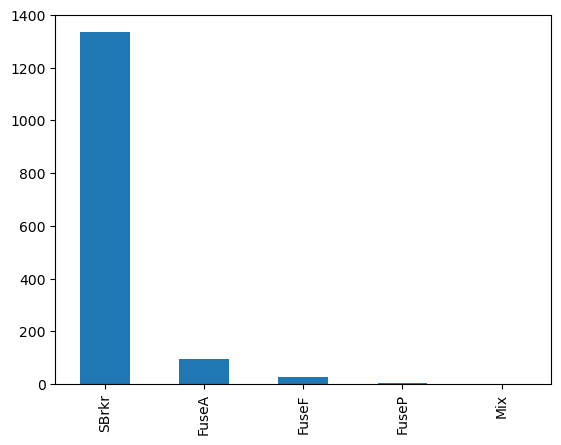

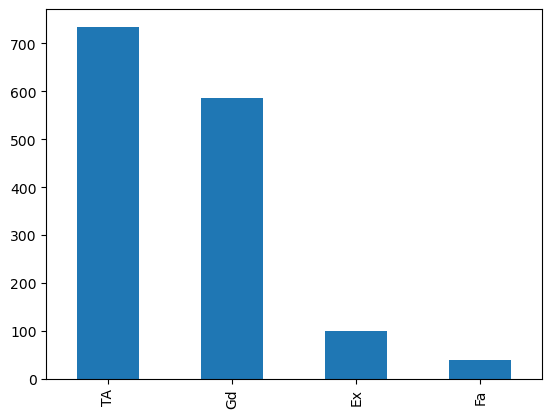

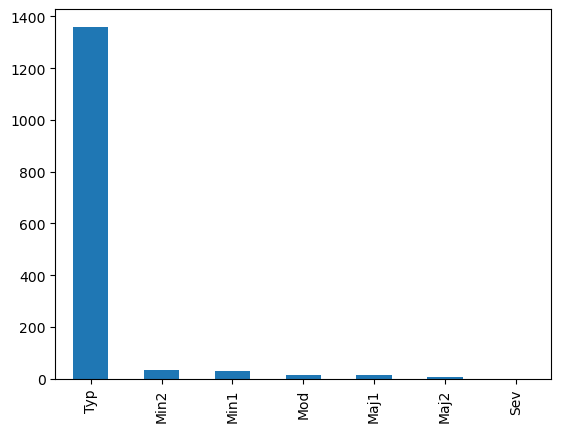

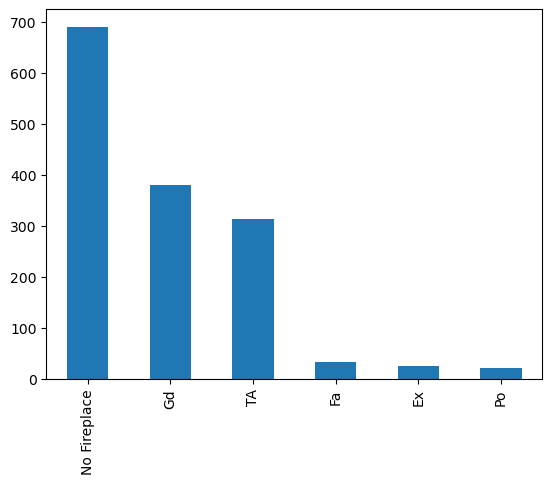

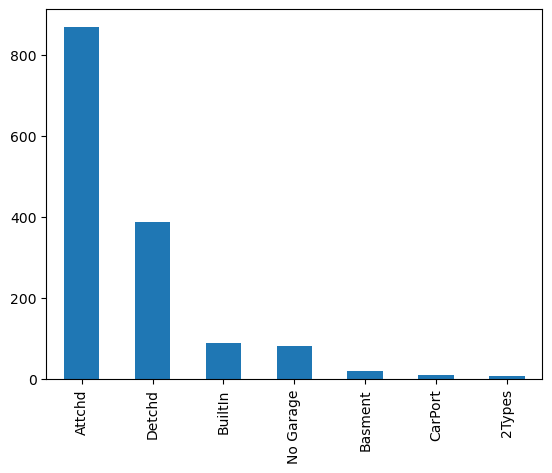

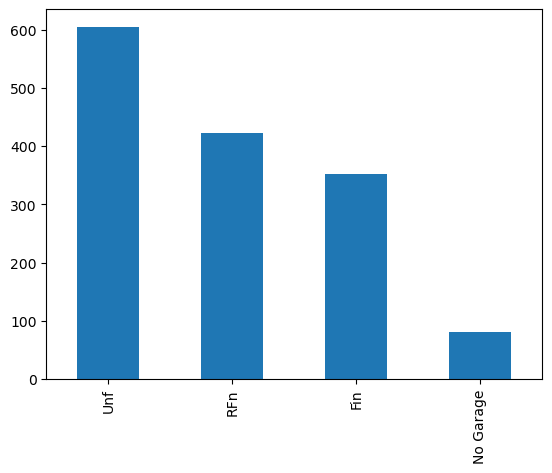

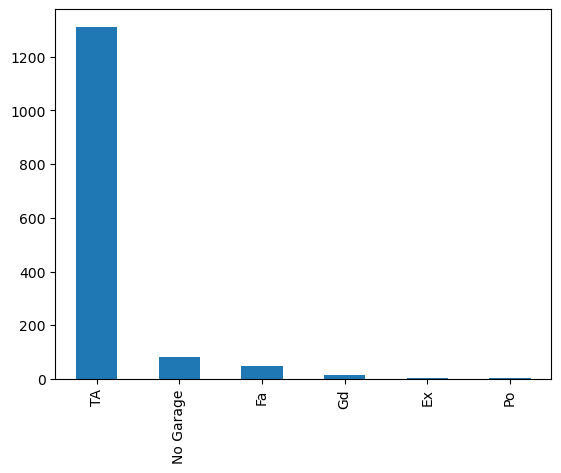

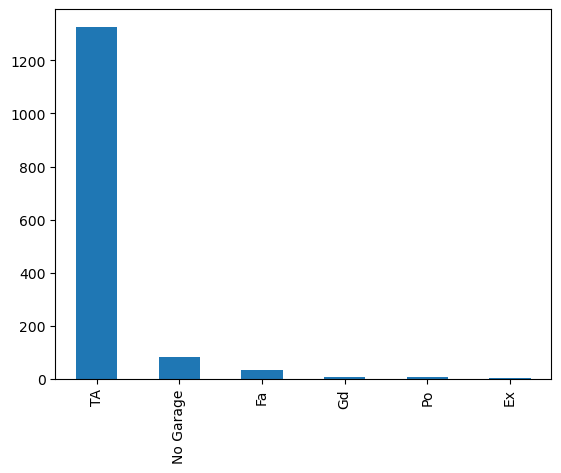

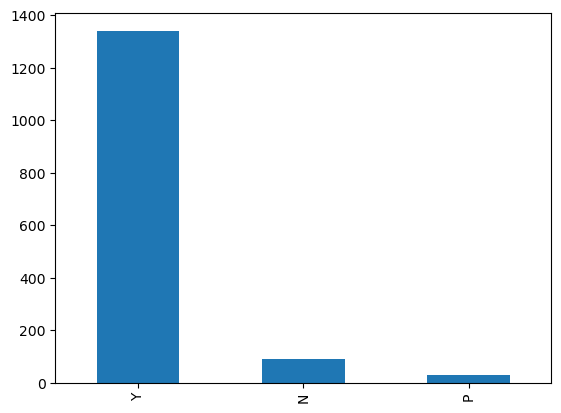

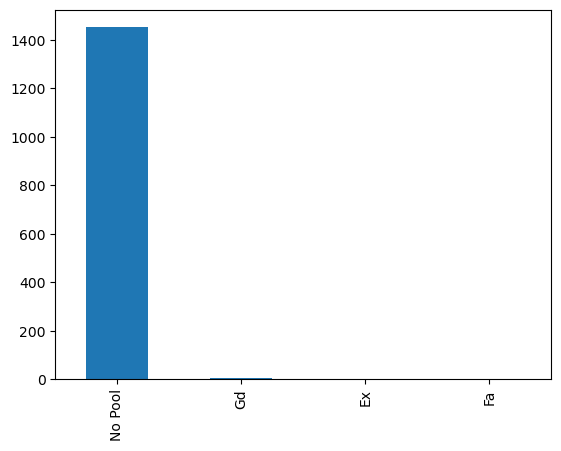

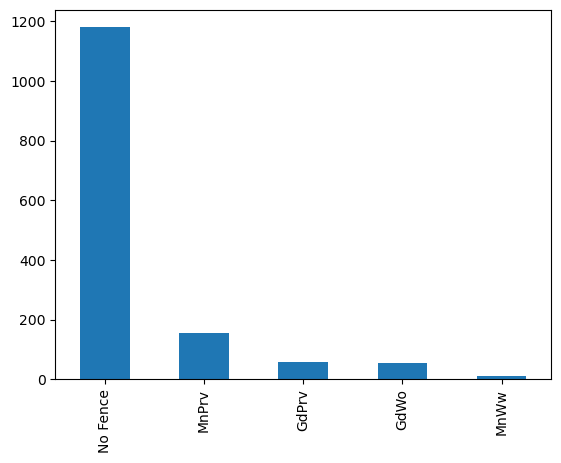

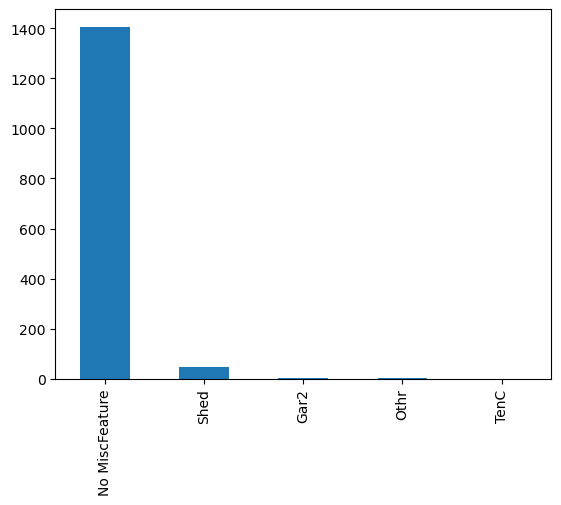

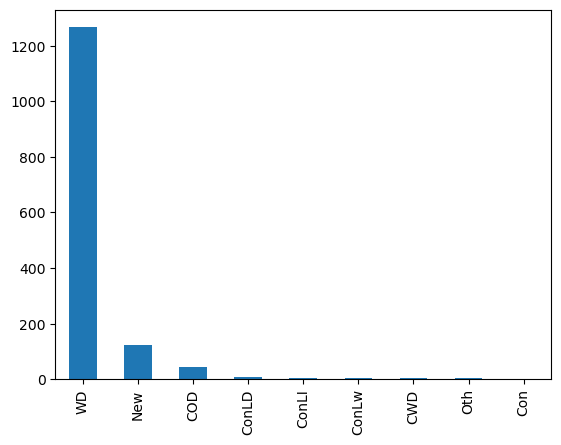

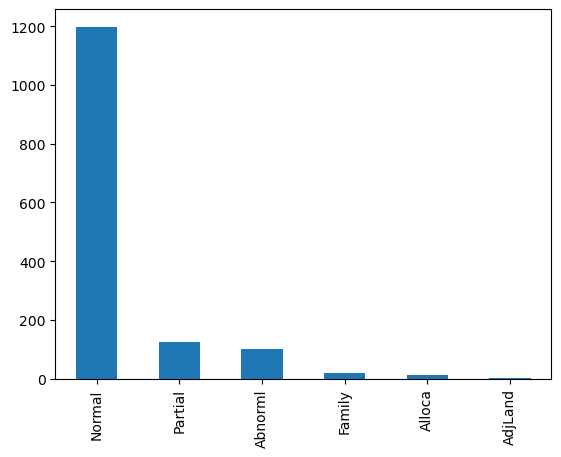

In [629]:
for col in list(df_c):
    df[col].value_counts().plot.bar()
    plt.show()

In [630]:
# Value count for each categorical column
for col in list(df_c):
    print(df[col].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor    

#### Dropping columns with lesser variance in data 

In [631]:

df.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating','BsmtFinType2','ExterCond',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','BldgType','SaleType'],
       axis=1, inplace=True)

In [632]:
df.shape

(1460, 53)


* Combining the lower number of value counts into a new value called "Other".
* Creating the dummy variables for the categorical variables with multiple levels.
* Dropping the dummy column, which has very low number of values (E.g.:-Other)

In [633]:
df_c = list(df.select_dtypes(include=['object']).columns)
print(df_c)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']


##### Remaining columns
  * Group least values to one category

In [634]:
df = df.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})
df = df.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})
df = df.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
df = df.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
df = df.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})

df = df.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}}) 
df = df.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})
df = df.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})
df = df.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})

df = df.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
df = df.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})
df = df.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})
df = df.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})
df = df.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})
df = df.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})
df = df.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})
df = df.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})
df = df.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})
df = df.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})
df = df.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})


# 3. Data Standardisation
#### Dummy variables

In [635]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,Norm,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0.0,150,Ex,856.0,854.0,0,1710.0,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,RFn,2,0,61.0,0.00,0,0,0,No Fence,0,Normal,208500,5
1,20,RL,80.0,9600.0,Reg,Other,Other,Feedr,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0.0,284,Ex,1262.0,0.0,0,1262.0,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,298,0.0,0.00,0,0,0,No Fence,0,Normal,181500,31
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,Norm,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0.0,434,Ex,920.0,866.0,0,1786.0,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,0,42.0,0.00,0,0,0,No Fence,0,Normal,223500,7
3,Other,RL,60.0,9550.0,IR1,Corner,Crawfor,Norm,2Story,7,5,Gable,Wd Sdng,Other,None,0.0,TA,BrkTil,TA,No,ALQ,216,0.0,540,Gd,961.0,756.0,0,1717.0,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,0,35.0,180.15,0,0,0,No Fence,0,Abnorml,140000,91
4,60,RL,84.0,14260.0,IR1,Other,Other,Norm,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0.0,490,Ex,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,192,84.0,0.00,0,0,0,No Fence,0,Normal,250000,8


In [636]:
MSZoning_d = pd.get_dummies(df['MSZoning'], prefix = 'MSZoning')
LotShape_d = pd.get_dummies(df['LotShape'], prefix = 'LotShape')
LotConfig_d = pd.get_dummies(df['LotConfig'], prefix = 'LotConfig')
Neighborhood_d = pd.get_dummies(df['Neighborhood'], prefix = 'Neighborhood')
Condition1_d = pd.get_dummies(df['Condition1'], prefix = 'Condition1')
HouseStyle_d = pd.get_dummies(df['HouseStyle'], prefix = 'HouseStyle')
OverallQual_d = pd.get_dummies(df['OverallQual'], prefix = 'OverallQual')
OverallCond_d = pd.get_dummies(df['OverallCond'], prefix = 'OverallCond')
RoofStyle_d = pd.get_dummies(df['RoofStyle'], prefix = 'RoofStyle')
Exterior1st_d = pd.get_dummies(df['Exterior1st'], prefix = 'Exterior1st')
Exterior2nd_d = pd.get_dummies(df['Exterior2nd'], prefix = 'Exterior2nd')
MasVnrType_d = pd.get_dummies(df['MasVnrType'], prefix = 'MasVnrType')
ExterQual_d = pd.get_dummies(df['ExterQual'], prefix = 'ExterQual')
Foundation_d = pd.get_dummies(df['Foundation'], prefix = 'Foundation')
BsmtQual_d = pd.get_dummies(df['BsmtQual'], prefix = 'BsmtQual')
BsmtExposure_d = pd.get_dummies(df['BsmtExposure'], prefix = 'BsmtExposure')
BsmtFinType_d = pd.get_dummies(df['BsmtFinType1'], prefix = 'BsmtFinType1')
HeatingQC_d = pd.get_dummies(df['HeatingQC'], prefix = 'HeatingQC')
KitchenQual_d = pd.get_dummies(df['KitchenQual'], prefix = 'KitchenQual')
FireplaceQu_d = pd.get_dummies(df['FireplaceQu'], prefix = 'FireplaceQu')
GarageType_d = pd.get_dummies(df['GarageType'], prefix = 'GarageType')
GarageFinish_d = pd.get_dummies(df['GarageFinish'], prefix = 'GarageFinish')
Fence_d = pd.get_dummies(df['Fence'], prefix = 'Fence')
SaleCondition_d = pd.get_dummies(df['SaleCondition'], prefix = 'SaleCondition')
MSSubClass_d = pd.get_dummies(df['MSSubClass'], prefix = 'MSSubClass')




In [637]:
# Adding result to master df

df = pd.concat([df, MSZoning_d ,
LotShape_d ,
LotConfig_d ,
Neighborhood_d ,
Condition1_d ,
HouseStyle_d ,
OverallQual_d ,
OverallCond_d ,
RoofStyle_d ,
Exterior1st_d ,
Exterior2nd_d ,
MasVnrType_d ,
ExterQual_d ,
Foundation_d ,
BsmtQual_d ,
BsmtExposure_d ,
BsmtFinType_d ,
HeatingQC_d ,
KitchenQual_d ,
FireplaceQu_d ,
GarageType_d ,
GarageFinish_d ,
Fence_d ,
SaleCondition_d ,
MSSubClass_d 
 ], axis=1)

In [638]:
# Dropping original variable
df.drop(['MSZoning',
'LotShape',
'LotConfig',
'Neighborhood',
'Condition1',
'HouseStyle',
'OverallQual',
'OverallCond',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'Foundation',
'BsmtQual',
'BsmtExposure',
'BsmtFinType1',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageType',
'GarageFinish',
'Fence',
'SaleCondition',
'MSSubClass'],axis=1,inplace=True)

In [639]:
# Further dropping other columns 
df.drop(['MSZoning_Other','LotShape_Other','LotConfig_Other','Neighborhood_Other','Condition1_Other',
              'OverallQual_Other','OverallCond_Other','RoofStyle_Other','Exterior1st_Other','Exterior2nd_Other',
              'MasVnrType_BrkCmn','ExterQual_Other','Foundation_Other','BsmtQual_Other','BsmtExposure_No Basement','BsmtFinType1_No Basement',
              'HeatingQC_Other','KitchenQual_Other','FireplaceQu_Other','GarageFinish_No Garage','GarageType_Other','Fence_Other','SaleCondition_Other',
              'MSSubClass_Other']
               ,axis=1,inplace=True)

In [640]:
df.shape

(1460, 122)

#### Checking skewness of target column

<Axes: xlabel='SalePrice', ylabel='Density'>

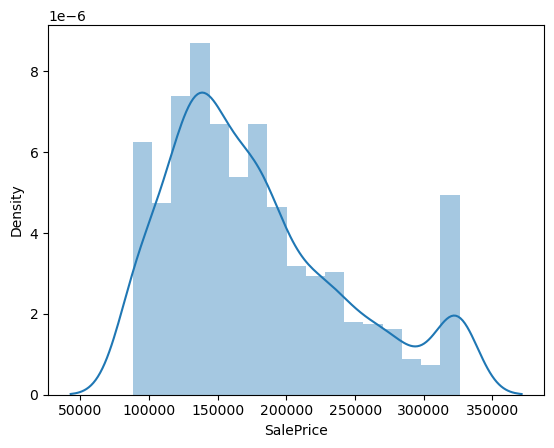

In [641]:
sns.distplot(df['SalePrice'])


In [642]:
df['SalePrice'].skew()


0.8093608815268374

In [643]:

# Import library
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
0,65.0,8450.0,196.0,706,0.0,150,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2,0,61.0,0.00,0,0,0,0,208500,5,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,80.0,9600.0,0.0,978,0.0,284,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,2,298,0.0,0.00,0,0,0,0,181500,31,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
2,68.0,11250.0,162.0,486,0.0,434,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2,0,42.0,0.00,0,0,0,0,223500,7,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,60.0,9550.0,0.0,216,0.0,540,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,3,0,35.0,180.15,0,0,0,0,140000,91,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
4,84.0,14260.0,350.0,655,0.0,490,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,3,192,84.0,0.00,0,0,0,0,250000,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


 # 4. Test Train Fit
  * Perform test train split
  * Perform data normalization (using minmaxscaler)

In [644]:
from sklearn.model_selection import train_test_split


In [645]:
# Splitting data into train and test set with 80:20 ratio
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

In [646]:

print(df_train.shape)
print(df_test.shape)

(1168, 122)
(292, 122)


In [647]:
# scale
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [648]:
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data into scaler and transform
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
133,0.485672,0.251344,0.298246,0.788854,0.0,0.178474,0.537900,0.000000,0.0,0.276868,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.573134,0.142816,0.0,0.0,0.0,0.0,0.0,0.554389,0.077778,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
290,1.000000,0.872944,0.000000,0.000000,0.0,0.735014,0.350557,0.736164,0.0,0.661887,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.5,0.666667,0.000000,0.291345,0.0,0.0,0.0,0.0,0.0,0.609954,0.000000,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
24,0.485672,0.350212,0.000000,0.147567,1.0,0.138965,0.334154,0.000000,0.0,0.131018,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.5,0.333333,1.000000,0.514139,0.0,0.0,0.0,0.0,0.0,0.277194,0.455556,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
1093,0.515062,0.420052,0.364035,0.518838,0.0,0.138283,0.455020,0.000000,0.0,0.217539,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.666667,0.000000,0.365610,0.0,0.0,0.0,0.0,0.0,0.243595,0.444444,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0
1288,0.059515,0.166955,0.000000,0.908948,0.0,0.233651,0.851291,0.000000,0.0,0.501205,1.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.5,0.666667,0.632836,0.337047,0.0,0.0,0.0,0.0,0.0,0.797984,0.088889,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1


In [649]:
df_train.describe()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.0,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.485700,0.452296,0.201430,0.343157,0.085023,0.375632,0.416689,0.295335,0.0,0.405371,0.425514,0.056507,0.550514,0.369007,0.441353,0.0,0.419092,0.30137,0.590183,0.266863,0.244768,0.116360,0.0,0.066470,0.0,0.0,0.374547,0.393208,0.789384,0.152397,0.328767,0.635274,0.190068,0.711473,0.036815,0.096747,0.035103,0.07363,0.052226,0.151541,0.047945,0.057363,0.082192,0.047945,0.041096,0.055651,0.053082,0.859589,0.109589,0.011986,0.494863,0.005137,0.007705,0.300514,0.023973,0.046233,0.079623,0.279966,0.248288,0.214041,0.121575,0.565068,0.163527,0.149829,0.049658,0.791952,0.191781,0.152397,0.164384,0.072774,0.340753,0.142123,0.141267,0.160103,0.095034,0.3

In [650]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
133,0.485672,0.251344,0.298246,0.788854,0.0,0.178474,0.537900,0.000000,0.0,0.276868,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.666667,0.573134,0.142816,0.0,0.0,0.0,0.0,0.0,0.554389,0.077778,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
290,1.000000,0.872944,0.000000,0.000000,0.0,0.735014,0.350557,0.736164,0.0,0.661887,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.5,0.666667,0.000000,0.291345,0.0,0.0,0.0,0.0,0.0,0.609954,0.000000,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
24,0.485672,0.350212,0.000000,0.147567,1.0,0.138965,0.334154,0.000000,0.0,0.131018,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.5,0.333333,1.000000,0.514139,0.0,0.0,0.0,0.0,0.0,0.277194,0.455556,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
1093,0.515062,0.420052,0.364035,0.518838,0.0,0.138283,0.455020,0.000000,0.0,0.217539,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.666667,0.000000,0.365610,0.0,0.0,0.0,0.0,0.0,0.243595,0.444444,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0
1288,0.059515,0.166955,0.000000,0.908948,0.0,0.233651,0.851291,0.000000,0.0,0.501205,1.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.5,0.666667,0.632836,0.337047,0.0,0.0,0.0,0.0,0.0,0.797984,0.088889,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1


In [652]:
# Variables more than 0.70 correlations 
c = df_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                          0
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.978075
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.978075
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.977136
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.977136
RoofStyle_Gable          RoofStyle_Hip             0.950398
RoofStyle_Hip            RoofStyle_Gable           0.950398
HouseStyle_1.5Fin        MSSubClass_50             0.928276
MSSubClass_50            HouseStyle_1.5Fin         0.928276
LotShape_IR1             LotShape_Reg              0.923644
LotShape_Reg             LotShape_IR1              0.923644
Fireplaces               FireplaceQu_No Fireplace  0.913060
FireplaceQu_No Fireplace Fireplaces                0.913060
ExterQual_Gd             ExterQual_TA              0.908961
ExterQual_TA             ExterQual_Gd              0.908961
Exterior2nd_Wd Sdng      Exterior1st_Wd Sdng       0.875187
Exterior1st_Wd Sdng      Exterior2nd_Wd 

# Feature Scaling 
# Normalization

In [653]:

#dropping one 

df_train = df_train.drop(['Exterior2nd_VinylSd','Exterior2nd_MetalSd','HouseStyle_1.5Fin','RoofStyle_Hip','LotShape_IR1',
                         'ExterQual_Gd','Fireplaces','Exterior2nd_HdBoard','Exterior2nd_Wd Sdng',
                         'KitchenQual_Gd','HouseStyle_2Story','MSZoning_RM','MasVnrType_BrkFace',
                        'Foundation_CBlock','HouseStyle_1Story','BsmtQual_Gd','LotConfig_Corner',
                         'Exterior2nd_Plywood','Fence_MnPrv','GarageType_Detchd','GrLivArea'], axis=1)

In [654]:
df_train.shape



(1168, 101)

In [655]:
# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')
# Creating X_train
X_train = df_train

In [656]:

y_train.head()


133     0.554389
290     0.609954
24      0.277194
1093    0.243595
1288    0.797984
Name: SalePrice, dtype: float64

In [657]:
X_train.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,MSZoning_RL,LotShape_Reg,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_TA,Foundation_BrkTil,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
133,0.485672,0.251344,0.298246,0.788854,0.0,0.178474,0.537900,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.666667,0.573134,0.142816,0.0,0.0,0.0,0.0,0.0,0.077778,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
290,1.000000,0.872944,0.000000,0.000000,0.0,0.735014,0.350557,0.736164,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.666667,0.000000,0.291345,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
24,0.485672,0.350212,0.000000,0.147567,1.0,0.138965,0.334154,0.000000,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.333333,1.000000,0.514139,0.0,0.0,0.0,0.0,0.0,0.455556,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0
1093,0.515062,0.420052,0.364035,0.518838,0.0,0.138283,0.455020,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.666667,0.000000,0.365610,0.0,0.0,0.0,0.0,0.0,0.444444,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1288,0.059515,0.166955,0.000000,0.908948,0.0,0.233651,0.851291,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.666667,0.632836,0.337047,0.0,0.0,0.0,0.0,0.0,0.088889,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1


In [658]:

# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
1436,0.353417,0.403728,0.000000,0.483516,0.0,0.168937,0.164940,0.000000,0.0,0.009888,0.0,0.0,0.0,0.0,0.5,0.0,0.166667,0.0,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.136497,0.388889,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
57,0.779574,0.591457,0.000000,0.000000,0.0,0.585831,0.161487,0.753692,0.0,0.538904,0.0,0.0,1.0,1.0,0.5,0.0,0.500000,0.0,0.666667,0.000000,0.399886,0.0,0.0,0.0,0.0,0.0,0.455691,0.011111,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
780,0.397502,0.323881,0.083333,0.000000,0.0,0.842643,0.500777,0.000000,0.0,0.250294,0.0,0.0,1.0,0.0,0.5,0.0,0.333333,0.5,0.666667,0.656716,0.119966,0.0,0.0,0.0,0.0,0.0,0.369593,0.122222,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
382,0.632623,0.421117,0.000000,0.000000,0.0,0.639646,0.229690,0.751939,0.0,0.586490,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.0,0.666667,0.429851,0.302771,0.0,0.0,0.0,0.0,0.0,0.527089,0.000000,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1170,0.588538,0.466186,0.000000,0.409733,0.0,0.391008,0.384227,0.000000,0.0,0.166862,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.5,0.333333,0.605970,0.000000,0.0,0.0,0.0,0.0,0.0,0.348593,0.333333,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [659]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
# Creating X_test
X_test = df_test

In [660]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,HouseAge,MSZoning_RL,LotShape_Reg,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_TA,Foundation_BrkTil,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
1436,0.353417,0.403728,0.000000,0.483516,0.0,0.168937,0.164940,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.166667,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.388889,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
57,0.779574,0.591457,0.000000,0.000000,0.0,0.585831,0.161487,0.753692,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.500000,0.666667,0.000000,0.399886,0.0,0.0,0.0,0.0,0.0,0.011111,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
780,0.397502,0.323881,0.083333,0.000000,0.0,0.842643,0.500777,0.000000,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.333333,0.666667,0.656716,0.119966,0.0,0.0,0.0,0.0,0.0,0.122222,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
382,0.632623,0.421117,0.000000,0.000000,0.0,0.639646,0.229690,0.751939,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.666667,0.429851,0.302771,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
1170,0.588538,0.466186,0.000000,0.409733,0.0,0.391008,0.384227,0.000000,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.333333,0.333333,0.605970,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


 # 6. Model building
    * Linear Regression
    * Ridge
    * Lasso


In [661]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

### Linear Regression


In [662]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression()

In [663]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

161346853998.39032
[-5.48987609e-03  9.01440969e-02  3.10992465e-02  1.37383437e-01
  4.30289752e-02  7.97731818e-02  2.41624155e-01  2.10538588e-01
 -1.26497405e+10  1.52554512e-02 -2.56666541e-03 -2.28738785e-03
  1.48691945e-02 -6.37352467e-03 -4.15261882e+10 -9.01758671e-03
  1.06442451e-01  2.84385681e-02  1.73000097e-02  1.24112368e-02
  2.46125435e+09  1.10034943e-02  6.63908609e+09  6.04618019e+09
 -7.94684887e-02  2.91996002e-02 -6.26707077e-03  2.41255760e-03
  2.39735842e-02 -1.62768364e-02  8.51602554e-02 -7.25500584e-02
 -2.74429321e-02 -4.69407439e-02 -3.40591669e-02  6.51283264e-02
 -2.49044895e-02 -4.68040071e-02 -1.01206601e-02  7.41770267e-02
 -9.74178314e-03  3.50286961e-02  2.24030018e-02  3.11809778e-02
  9.93470848e-03  2.89199948e-02  3.44418878e-02 -1.06019557e-01
 -1.07811928e-01 -1.02080345e-01 -4.23488617e-02  3.68645191e-02
  1.93538666e-02  4.35957909e-02  8.06295872e-02  8.64446759e-02
 -5.82551956e-03 -3.63216400e-02 -6.66141510e-03 -3.48763466e-02
 -9.03

## Predictions

In [664]:

# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.9043636452771732

In [665]:

# Fit the model with test set
y_test_pred = lm.predict(X_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.8867324104352763

In [666]:
from sklearn.metrics import r2_score, mean_squared_error
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9043636452771732
0.8867324104352763
8.253271454427775
2.375574798323423
0.007066157067147067
0.0081355301312446


In [667]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.005489876090997929),
 ('LotFrontage', 0.090144096865368),
 ('LotArea', 0.03109924651083126),
 ('MasVnrArea', 0.13738343671462122),
 ('BsmtFinSF1', 0.04302897524781031),
 ('BsmtFinSF2', 0.07977318181998916),
 ('BsmtUnfSF', 0.24162415513906726),
 ('1stFlrSF', 0.21053858772854323),
 ('2ndFlrSF', -12649740451.593843),
 ('LowQualFinSF', 0.015255451202392578),
 ('BsmtFullBath', -0.0025666654109954834),
 ('BsmtHalfBath', -0.0022873878479003906),
 ('FullBath', 0.014869194477796555),
 ('HalfBath', -0.0063735246658325195),
 ('BedroomAbvGr', -41526188199.80214),
 ('KitchenAbvGr', -0.009017586708068848),
 ('TotRmsAbvGrd', 0.10644245147705078),
 ('GarageCars', 0.028438568115234375),
 ('WoodDeckSF', 0.017300009727478027),
 ('OpenPorchSF', 0.012411236763000488),
 ('EnclosedPorch', 2461254352.021262),
 ('3SsnPorch', 0.011003494262695312),
 ('ScreenPorch', 6639086090.1660185),
 ('PoolArea', 6046180191.378266),
 ('MiscVal', -0.0794684886932373),
 ('HouseAge', 0.029199600219726562),
 ('M

## Ridge Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [668]:

# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [669]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)     
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [670]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006893,0.004205,0.002394,0.000485,0.0001,{'alpha': 0.0001},-0.066427,-0.062854,-0.067252,-0.064750,-0.064960,-0.065249,0.001514,19,-0.057941,-0.059499,-0.056926,-0.058293,-0.059022,-0.058336,0.000891
1,0.005097,0.003863,0.001964,0.001278,0.001,{'alpha': 0.001},-0.066426,-0.062854,-0.067252,-0.064747,-0.064961,-0.065248,0.001515,18,-0.057941,-0.059498,-0.056927,-0.058293,-0.059023,-0.058336,0.000891
2,0.002801,0.001470,0.001691,0.000864,0.01,{'alpha': 0.01},-0.066421,-0.062853,-0.067251,-0.064721,-0.064969,-0.065243,0.001515,17,-0.057947,-0.059497,-0.056932,-0.058301,-0.059027,-0.058341,0.000889
3,0.009810,0.006236,0.000000,0.000000,0.05,{'alpha': 0.05},-0.066397,-0.062847,-0.067241,-0.064624,-0.064996,-0.065221,0.001517,16,-0.057963,-0.059491,-0.056947,-0.058324,-0.059040,-0.058353,0.000883
4,0.005501,0.004673,0.002467,0.001603,0.1,{'alpha': 0.1},-0.066365,-0.062840,-0.067221,-0.064526,-0.065025,-0.065196,0.001516,15,-0.057974,-0.059484,-0.056959,-0.058339,-0.059048,-0.058361,0.000877


In [671]:

# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

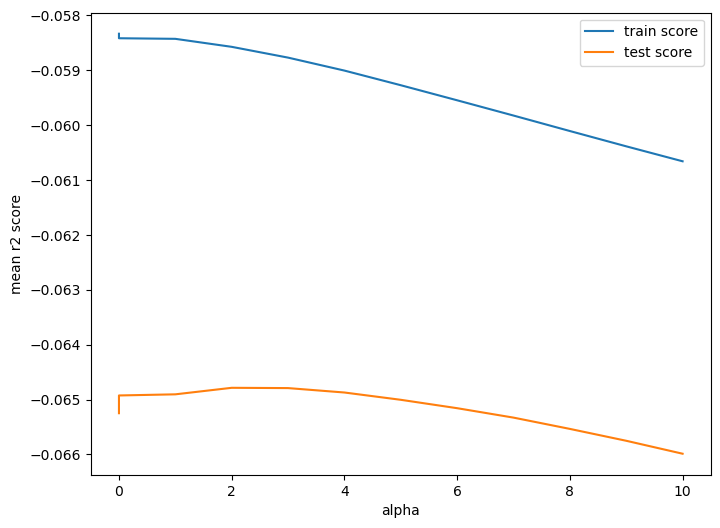

In [672]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [673]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


Analysis of the above graph
*Train Score*

As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. Thus by increasing the alpha the model becomes more simple.
*Test Score*

With the very lower value of alpha, the error is high as we can see the r2 value decreased. But the error for the train set is low. It means that the model is clearly overfitting with very low value of alpha.
With the increasing value of alpha, the error started decreasing more and it reached to a peak at alpha=2. Here, the error is least and accuracy (r2 score) is the highest.
After alpha=2, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.
We need to pick the value of aplha for which the test score peaks up. In this case in alpha=2, the error is least in the test set and hence the accuracy is more approximately 81%.

So, the optimum alpha will be 2, for which we will have a right balance between the error and the generalisation of the model for creting a simpler model.

Ridge regression with optimal alpha = 2

In [674]:
# Instantiate Ridge regression with alpha=2
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [675]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.903820748157498


In [676]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.886364014829148


In [677]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = y_train_pred
y_pred_test = y_test_pred

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.903820748157498
0.886364014829148
8.30012264729781
2.3833012037417314
0.007106269389809769
0.008161990423773052


In [678]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', -0.024),
 ('LotFrontage', -0.0),
 ('LotArea', 0.089),
 ('MasVnrArea', 0.034),
 ('BsmtFinSF1', 0.128),
 ('BsmtFinSF2', 0.039),
 ('BsmtUnfSF', 0.073),
 ('1stFlrSF', 0.22),
 ('2ndFlrSF', 0.182),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', -0.003),
 ('FullBath', 0.003),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', -0.005),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.01),
 ('GarageCars', 0.101),
 ('WoodDeckSF', 0.03),
 ('OpenPorchSF', 0.019),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.011),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('HouseAge', -0.07),
 ('MSZoning_RL', 0.027),
 ('LotShape_Reg', -0.008),
 ('LotConfig_Inside', 0.002),
 ('Neighborhood_BrkSide', 0.022),
 ('Neighborhood_CollgCr', -0.018),
 ('Neighborhood_Crawfor', 0.081),
 ('Neighborhood_Edwards', -0.07),
 ('Neighborhood_Gilbert', -0.03),
 ('Neighborhood_NAmes', -0.045),
 ('Neighborhood_NWAmes', -0.032),
 ('Neighborhood_NridgHt', 0.064),
 ('Neighborhood_OldTown', -0.024),
 (

In [679]:
len(ridge_param_list)-1

100

In [680]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
7,1stFlrSF,0.220
8,2ndFlrSF,0.182
4,BsmtFinSF1,0.128
17,GarageCars,0.101
2,LotArea,0.089
31,Neighborhood_Crawfor,0.081
56,OverallCond_8,0.075
55,OverallCond_7,0.073
6,BsmtUnfSF,0.073
40,Neighborhood_Somerst,0.069


### Ridge with double the value of alpha i.e 4

In [681]:
# Instantiate Ridge regression with alpha=6
model_ridge = Ridge(alpha=4)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=4)

In [682]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9028734243614743


In [683]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.88548917590691


In [684]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = y_train_pred
y_pred_test = y_test_pred

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9028734243614743
0.88548917590691
8.381875245109404
2.401649305826778
0.007176263052319695
0.008224826389817733


In [685]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', -0.014),
 ('LotFrontage', 0.004),
 ('LotArea', 0.087),
 ('MasVnrArea', 0.035),
 ('BsmtFinSF1', 0.121),
 ('BsmtFinSF2', 0.037),
 ('BsmtUnfSF', 0.069),
 ('1stFlrSF', 0.204),
 ('2ndFlrSF', 0.162),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.018),
 ('BsmtHalfBath', -0.003),
 ('FullBath', 0.007),
 ('HalfBath', 0.022),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.021),
 ('GarageCars', 0.097),
 ('WoodDeckSF', 0.031),
 ('OpenPorchSF', 0.02),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.011),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('HouseAge', -0.063),
 ('MSZoning_RL', 0.025),
 ('LotShape_Reg', -0.009),
 ('LotConfig_Inside', 0.001),
 ('Neighborhood_BrkSide', 0.021),
 ('Neighborhood_CollgCr', -0.019),
 ('Neighborhood_Crawfor', 0.077),
 ('Neighborhood_Edwards', -0.069),
 ('Neighborhood_Gilbert', -0.032),
 ('Neighborhood_NAmes', -0.043),
 ('Neighborhood_NWAmes', -0.029),
 ('Neighborhood_NridgHt', 0.063),
 ('Neighborhood_OldTown', -0.02

In [686]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
7,1stFlrSF,0.204
8,2ndFlrSF,0.162
4,BsmtFinSF1,0.121
17,GarageCars,0.097
2,LotArea,0.087
31,Neighborhood_Crawfor,0.077
6,BsmtUnfSF,0.069
55,OverallCond_7,0.067
56,OverallCond_8,0.067
40,Neighborhood_Somerst,0.065


In [687]:
len(ridge_param_list)-1

100

## Lasso Regression

In [688]:

# Importing Lasso module
from sklearn.linear_model import Lasso

In [689]:
lasso = Lasso()


In [690]:
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [691]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011834,0.004252,0.002960,0.000181,0.0001,{'alpha': 0.0001},0.874905,0.906939,0.856342,0.882600,0.888910,0.881939,0.016605,1,0.907488,0.899677,0.913301,0.906577,0.903899,0.906189,0.004474
1,0.003113,0.002584,0.003874,0.004357,0.001,{'alpha': 0.001},0.870179,0.904832,0.854646,0.890659,0.870129,0.878089,0.017600,2,0.896487,0.888103,0.901124,0.893021,0.893408,0.894429,0.004292
2,0.005936,0.007289,0.006130,0.007510,0.01,{'alpha': 0.01},0.789629,0.782132,0.779137,0.788139,0.741002,0.776008,0.017919,3,0.791697,0.780179,0.795114,0.783014,0.795158,0.789033,0.006264
3,0.002924,0.002444,0.004447,0.004918,0.05,{'alpha': 0.05},0.371923,0.330624,0.356096,0.334957,0.333374,0.345395,0.016062,4,0.349207,0.357632,0.356139,0.352330,0.365029,0.356067,0.005363
4,0.004460,0.001017,0.001720,0.000891,0.1,{'alpha': 0.1},-0.009637,-0.003004,-0.001959,-0.030345,-0.008308,-0.010651,0.010280,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [692]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [693]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

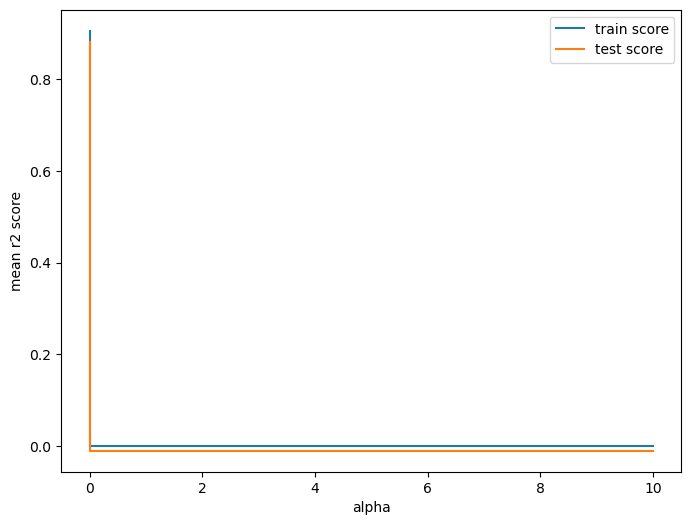

In [694]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

Analysis of the above graph
From the above graph we can see that with very lower value of alpha (almost colse to 0) the accuracy of the train and test set is the highest. Coincidentally they both are alomost same.

*Train Score*

As the alpha (lambda) increases, the r2 score decreases. That means the error increases. Because the model becomes less overfitting and more generalised. At 0.0001 (close to 0) the train set accury is highest(more than 80%).
*Test Score*

At alpha = 0.0001 the test accuracy is highest (more than 80%).
After alpha=0.0001, the r2 score started decreasing as the alpha is increasing. Hence, the model accuracy started dipping.
We need to pick the value of aplha for which the test score peaks up. In this case at alpha=0.002, the error is least in the test set and hence the accuracy is more approximately 80%.

So, the optimum alpha will be 0.0001, for which we will have a right balance between the error and the generalisation of the model for creating a simpler model.

Lasso regression with optimal alpha 0.0001

In [695]:
# Instantiate Lasso regression with alpha=0.001
model_lasso = Lasso(0.0001)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [696]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.9038335014684991


In [697]:

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8864894307935876


In [698]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', -0.024),
 ('LotFrontage', -0.0),
 ('LotArea', 0.087),
 ('MasVnrArea', 0.029),
 ('BsmtFinSF1', 0.135),
 ('BsmtFinSF2', 0.041),
 ('BsmtUnfSF', 0.079),
 ('1stFlrSF', 0.236),
 ('2ndFlrSF', 0.2),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -0.001),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', -0.006),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('GarageCars', 0.1),
 ('WoodDeckSF', 0.029),
 ('OpenPorchSF', 0.017),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.01),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('HouseAge', -0.075),
 ('MSZoning_RL', 0.027),
 ('LotShape_Reg', -0.006),
 ('LotConfig_Inside', 0.001),
 ('Neighborhood_BrkSide', 0.022),
 ('Neighborhood_CollgCr', -0.014),
 ('Neighborhood_Crawfor', 0.082),
 ('Neighborhood_Edwards', -0.07),
 ('Neighborhood_Gilbert', -0.024),
 ('Neighborhood_NAmes', -0.043),
 ('Neighborhood_NWAmes', -0.028),
 ('Neighborhood_NridgHt', 0.066),
 ('Neighborhood_OldTown', -0.024),
 ('N

In [699]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = y_train_pred
y_pred_test = y_test_pred
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9038335014684991
0.8864894307935876
8.299022056022247
2.3806708396139586
0.0071053271027587735
0.008152982327445064


In [700]:
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,-0.024
2,LotArea,0.087
3,MasVnrArea,0.029
4,BsmtFinSF1,0.135
5,BsmtFinSF2,0.041
6,BsmtUnfSF,0.079
7,1stFlrSF,0.236
8,2ndFlrSF,0.200
10,BsmtFullBath,0.016
12,FullBath,-0.001


In [701]:
len(lasso_params_df)-1


88

In [702]:
lasso_params_df.sort_values('Coef',ascending=False)


,Params,Coef
7,1stFlrSF,0.236
8,2ndFlrSF,0.200
4,BsmtFinSF1,0.135
17,GarageCars,0.100
2,LotArea,0.087
31,Neighborhood_Crawfor,0.082
6,BsmtUnfSF,0.079
56,OverallCond_8,0.078
55,OverallCond_7,0.074
40,Neighborhood_Somerst,0.071


In [703]:
(lasso_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
7,1stFlrSF,0.236
8,2ndFlrSF,0.200
4,BsmtFinSF1,0.135
17,GarageCars,0.100
2,LotArea,0.087
31,Neighborhood_Crawfor,0.082
6,BsmtUnfSF,0.079
56,OverallCond_8,0.078
55,OverallCond_7,0.074
40,Neighborhood_Somerst,0.071


In [704]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.904364,0.902873,0.903834
1,R2 Score (Test),0.886732,0.885489,0.886489
2,RSS (Train),8.253271,8.381875,8.299022
3,RSS (Test),2.375575,2.401649,2.380671
4,MSE (Train),0.084060,0.084713,0.084293
5,MSE (Test),0.090197,0.090691,0.090294


## Lasso Doubling the value of alpha

In [705]:
# Instantiate Lasso regression with alpha=0.0002
model_lasso = Lasso(0.0002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [706]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.902836528557491


In [707]:

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8860154788858127


In [708]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', -0.003),
 ('LotFrontage', 0.0),
 ('LotArea', 0.086),
 ('MasVnrArea', 0.027),
 ('BsmtFinSF1', 0.132),
 ('BsmtFinSF2', 0.038),
 ('BsmtUnfSF', 0.077),
 ('1stFlrSF', 0.234),
 ('2ndFlrSF', 0.191),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -0.0),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('GarageCars', 0.095),
 ('WoodDeckSF', 0.029),
 ('OpenPorchSF', 0.017),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.009),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('HouseAge', -0.072),
 ('MSZoning_RL', 0.024),
 ('LotShape_Reg', -0.007),
 ('LotConfig_Inside', 0.0),
 ('Neighborhood_BrkSide', 0.02),
 ('Neighborhood_CollgCr', -0.011),
 ('Neighborhood_Crawfor', 0.08),
 ('Neighborhood_Edwards', -0.067),
 ('Neighborhood_Gilbert', -0.021),
 ('Neighborhood_NAmes', -0.038),
 ('Neighborhood_NWAmes', -0.022),
 ('Neighborhood_NridgHt', 0.068),
 ('Neighborhood_OldTown', -0.022),
 ('Nei

In [709]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = y_train_pred
y_pred_test = y_test_pred
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.902836528557491
0.8860154788858127
8.385059296683579
2.390611090060305
0.007178989123872927
0.008187024281028441


In [710]:
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,-0.003
2,LotArea,0.086
3,MasVnrArea,0.027
4,BsmtFinSF1,0.132
5,BsmtFinSF2,0.038
6,BsmtUnfSF,0.077
7,1stFlrSF,0.234
8,2ndFlrSF,0.191
10,BsmtFullBath,0.016
13,HalfBath,0.016


In [711]:
len(lasso_params_df)-1


81

In [712]:
lasso_params_df.sort_values('Coef',ascending=False)


,Params,Coef
7,1stFlrSF,0.234
8,2ndFlrSF,0.191
4,BsmtFinSF1,0.132
17,GarageCars,0.095
2,LotArea,0.086
31,Neighborhood_Crawfor,0.080
6,BsmtUnfSF,0.077
56,OverallCond_8,0.070
40,Neighborhood_Somerst,0.069
36,Neighborhood_NridgHt,0.068


In [713]:
(lasso_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
7,1stFlrSF,0.234
8,2ndFlrSF,0.191
4,BsmtFinSF1,0.132
17,GarageCars,0.095
2,LotArea,0.086
31,Neighborhood_Crawfor,0.080
6,BsmtUnfSF,0.077
56,OverallCond_8,0.070
40,Neighborhood_Somerst,0.069
36,Neighborhood_NridgHt,0.068


## Building Lasso dropping important predictor variables 1stFlrSF 2ndFlrSF BsmtFinSF1 GarageCars LotArea

In [714]:
X_train.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','GarageCars','LotArea'], axis=1, inplace=True)
X_test.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','GarageCars','LotArea'], axis=1, inplace=True)

In [715]:
# Instantiate Lasso regression with alpha=0.001
model_lasso = Lasso(0.0001)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [716]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8674259222287741


In [717]:

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8461552290295982


In [718]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.122),
 ('LotFrontage', 0.061),
 ('MasVnrArea', 0.055),
 ('BsmtFinSF2', 0.012),
 ('BsmtUnfSF', 0.047),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.048),
 ('BsmtHalfBath', 0.009),
 ('FullBath', 0.043),
 ('HalfBath', 0.042),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.18),
 ('WoodDeckSF', 0.045),
 ('OpenPorchSF', 0.03),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.016),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('HouseAge', -0.069),
 ('MSZoning_RL', 0.035),
 ('LotShape_Reg', -0.02),
 ('LotConfig_Inside', -0.006),
 ('Neighborhood_BrkSide', 0.021),
 ('Neighborhood_CollgCr', -0.034),
 ('Neighborhood_Crawfor', 0.098),
 ('Neighborhood_Edwards', -0.074),
 ('Neighborhood_Gilbert', -0.07),
 ('Neighborhood_NAmes', -0.048),
 ('Neighborhood_NWAmes', -0.031),
 ('Neighborhood_NridgHt', 0.062),
 ('Neighborhood_OldTown', -0.006),
 ('Neighborhood_Sawyer', -0.048),
 ('Neighborhood_SawyerW', -0.018),
 ('Neighborhood_Somerst', 0.051),
 ('Conditio

In [719]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = y_train_pred
y_pred_test = y_test_pred
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8674259222287741
0.8461552290295982
11.440940579944396
3.22660491121591
0.00979532583899349
0.011050016819232568


In [720]:
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,0.122
1,LotFrontage,0.061
2,MasVnrArea,0.055
3,BsmtFinSF2,0.012
4,BsmtUnfSF,0.047
6,BsmtFullBath,0.048
7,BsmtHalfBath,0.009
8,FullBath,0.043
9,HalfBath,0.042
10,BedroomAbvGr,0.015


In [721]:
len(lasso_params_df)-1


83

In [722]:
lasso_params_df.sort_values('Coef',ascending=False)


,Params,Coef
12,TotRmsAbvGrd,0.180
66,BsmtExposure_Gd,0.131
0,constant,0.122
26,Neighborhood_Crawfor,0.098
63,BsmtQual_Ex,0.082
47,OverallQual_8,0.071
31,Neighborhood_NridgHt,0.062
1,LotFrontage,0.061
50,OverallCond_7,0.061
65,BsmtExposure_Av,0.059


In [723]:
(lasso_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
12,TotRmsAbvGrd,0.180
66,BsmtExposure_Gd,0.131
0,constant,0.122
26,Neighborhood_Crawfor,0.098
63,BsmtQual_Ex,0.082
47,OverallQual_8,0.071
31,Neighborhood_NridgHt,0.062
1,LotFrontage,0.061
50,OverallCond_7,0.061
65,BsmtExposure_Av,0.059
